In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Dataset Merging


In [ ]:
import pandas as pd

# Paths
base_path = "/content/drive/MyDrive/Thesis/"
# Geospatial data aggregation
geolocation = pd.read_csv(base_path + "Datasets/olist_geolocation_dataset.csv")

In [ ]:
# Display the first few rows of the dataframe
print(geolocation.head())

# Get some info about the dataframe
print(geolocation.info())

# Describe the numerical features of the dataframe
print(geolocation.describe())

# Check for missing values
print(geolocation.isnull().sum())


   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   

In [ ]:
geo_agg = geolocation.groupby('geolocation_zip_code_prefix').agg({
    'geolocation_lat': 'mean',
    'geolocation_lng': 'mean'
}).reset_index()

In [ ]:
print(geo_agg.info())
print(geo_agg.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19015 entries, 0 to 19014
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geolocation_zip_code_prefix  19015 non-null  int64  
 1   geolocation_lat              19015 non-null  float64
 2   geolocation_lng              19015 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 445.8 KB
None
   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
0                         1001       -23.550190       -46.634024
1                         1002       -23.548146       -46.634979
2                         1003       -23.548994       -46.635731
3                         1004       -23.549799       -46.634757
4                         1005       -23.549456       -46.636733


In [ ]:
# Transactional data aggregation
orders = pd.read_csv(base_path + "Datasets/olist_orders_dataset.csv")
payments = pd.read_csv(base_path + "Datasets/olist_order_payments_dataset.csv")
items = pd.read_csv(base_path + "Datasets/olist_order_items_dataset.csv")

In [ ]:
# Display the first few rows of the orders dataframe
print(orders.head())

# Get some info about the orders dataframe
print(orders.info())

# Describe the numerical features of the orders dataframe
print(orders.describe())

# Check for missing values in the orders dataframe
print(orders.isnull().sum())


                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08

In [ ]:
print(payments.describe())
print(payments.info())


       payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.000000
75%              1.000000              4.000000     171.837500
max             29.000000             24.000000   13664.080000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   paymen

In [ ]:
# prompt: show the summary of items

print(items.describe())
print(items.info())


       order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.000000      74.990000      16.260000
75%         1.000000     134.900000      21.150000
max        21.000000    6735.000000     409.680000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value     

In [ ]:
# Merge transactional datasets
trans_data = orders.merge(payments, on='order_id', how='left')\
                   .merge(items, on='order_id', how='left')

In [ ]:
# prompt: view the summary of trans_data

print(trans_data.info())
print(trans_data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118434 entries, 0 to 118433
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118434 non-null  object 
 1   customer_id                    118434 non-null  object 
 2   order_status                   118434 non-null  object 
 3   order_purchase_timestamp       118434 non-null  object 
 4   order_approved_at              118258 non-null  object 
 5   order_delivered_carrier_date   116360 non-null  object 
 6   order_delivered_customer_date  115037 non-null  object 
 7   order_estimated_delivery_date  118434 non-null  object 
 8   payment_sequential             118431 non-null  float64
 9   payment_type                   118431 non-null  object 
 10  payment_installments           118431 non-null  float64
 11  payment_value                  118431 non-null  float64
 12  order_item_id                 

In [ ]:
# Behavioral data aggregation
reviews = pd.read_csv(base_path + "Datasets/olist_order_reviews_dataset.csv")
customers = pd.read_csv(base_path + "Datasets/olist_customers_dataset.csv")

In [ ]:
print(reviews.info())
print(reviews.describe())
print(customers.info())
print(customers.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None
       review_score
count  99224.000000
mean       4.086421
std        1.347579
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------       

In [ ]:
reviews_orders = pd.merge(reviews, orders[['order_id', 'customer_id']], on='order_id', how='left')
behavioral_data = pd.merge(reviews_orders, customers, on='customer_id', how='left')

In [ ]:
print(behavioral_data.head())
print(behavioral_data.isnull().sum())


                          review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3           

In [ ]:
# Now merge transactional + behavioral data
full_data = trans_data.merge(behavioral_data, on=['order_id', 'customer_id'], how='left')

In [ ]:
# Finally, merge geospatial
full_data = full_data.merge(
    geo_agg, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left'
)

In [ ]:
# Check the final dataset
print(full_data.shape)
print(full_data.head())

(119143, 31)
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00     

In [ ]:
# Check the number of unique orders and customers
print("Unique orders:", full_data['order_id'].nunique())
print("Unique customers:", full_data['customer_id'].nunique())

# Simple descriptive statistics
print(full_data.describe(include='all'))

# Check specific examples
full_data[full_data['order_id'] == 'e481f51cbdc54678b7cc49136f2d6af7']


Unique orders: 99441
Unique customers: 99441
                                order_id                       customer_id  \
count                             119143                            119143   
unique                             99441                             99441   
top     895ab968e7bb0d5659d16cd74cd1650c  270c23a11d024a44c896d1894b261a83   
freq                                  63                                63   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

       order_statu

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,...,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149.0,sao paulo,SP,3149.0,-23.576983,-46.587161
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3.0,voucher,...,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149.0,sao paulo,SP,3149.0,-23.576983,-46.587161
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2.0,voucher,...,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149.0,sao paulo,SP,3149.0,-23.576983,-46.587161


In [ ]:
print(full_data.isnull().sum())



order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   177
order_delivered_carrier_date       2086
order_delivered_customer_date      3421
order_estimated_delivery_date         0
payment_sequential                    3
payment_type                          3
payment_installments                  3
payment_value                         3
order_item_id                       833
product_id                          833
seller_id                           833
shipping_limit_date                 833
price                               833
freight_value                       833
review_id                           997
review_score                        997
review_comment_title             105154
review_comment_message            68898
review_creation_date                997
review_answer_timestamp             997
customer_unique_id                  997


In [ ]:
date_cols = ['order_purchase_timestamp', 'review_creation_date', 'review_answer_timestamp']
for col in date_cols:
    full_data[col] = pd.to_datetime(full_data[col], errors='coerce')


In [ ]:
from google.colab import files

# Save to temporary local disk
full_data.to_csv("full_data.csv", index=False)

# Trigger download to your local machine
files.download("full_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Integrated and sorted workflow
import pandas as pd
from pathlib import Path

BASE = Path('/content/drive/MyDrive/Thesis/Datasets')

# ---------- Load & light diagnostics ----------
def quick_report(df, name): print(f'{name}: {df.shape}, na%={df.isna().mean().mean():.3f}')

geo = pd.read_csv(BASE/'olist_geolocation_dataset.csv')
orders  = pd.read_csv(BASE/'olist_orders_dataset.csv', parse_dates=['order_purchase_timestamp'])
payments= pd.read_csv(BASE/'olist_order_payments_dataset.csv')
items   = pd.read_csv(BASE/'olist_order_items_dataset.csv')
reviews = pd.read_csv(BASE/'olist_order_reviews_dataset.csv', parse_dates=['review_creation_date','review_answer_timestamp'])
customers = pd.read_csv(BASE/'olist_customers_dataset.csv')

for d,n in [(geo,'geo'),(orders,'orders'),(items,'items')]: quick_report(d,n)

# ---------- Geo aggregation ----------
geo_agg = (geo
    .groupby('geolocation_zip_code_prefix', as_index=False)
    .agg(lat=('geolocation_lat','mean'), lng=('geolocation_lng','mean')))

# ---------- Transaction-level features ----------
agg_items = (items
    .groupby('order_id', as_index=False)
    .agg(n_products=('order_item_id','size'),
         n_sellers=('seller_id','nunique'),
         revenue=('price','sum'),
         freight=('freight_value','sum')))

trans = (orders
    .merge(payments, 'left', on='order_id')
    .merge(agg_items, 'left', on='order_id'))

# ---------- Behavioural & geo enrich ----------
behaviour = (reviews
    .merge(customers, 'left', on='customer_id')
    .merge(geo_agg, 'left',
           left_on='customer_zip_code_prefix',
           right_on='geolocation_zip_code_prefix'))

full_data = trans.merge(behaviour, how='left', on=['order_id','customer_id']) \
                 .drop(columns=['geolocation_zip_code_prefix'])

quick_report(full_data,'full_data')

# Exploratory Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
full_data = pd.read_csv(base_path + "Datasets/full_data.csv")

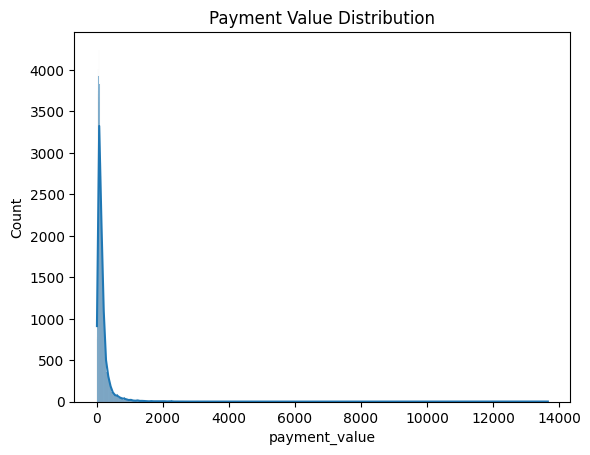

In [ ]:
# Check distributions
sns.histplot(full_data['payment_value'], kde=True)
plt.title('Payment Value Distribution')
plt.show()

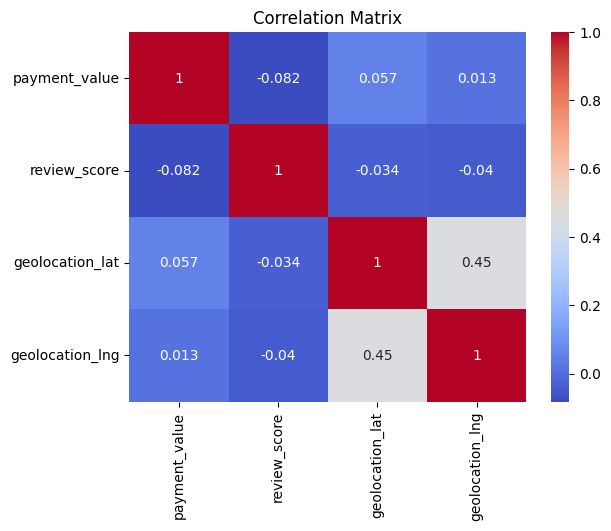

In [ ]:
# Correlation matrix
corr_matrix = full_data[['payment_value', 'review_score', 'geolocation_lat', 'geolocation_lng']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Check for missing values
print(full_data.isnull().sum())

# Explore specific columns or subsets of data
# Example 1: Examine the first 10 rows of the DataFrame
print(full_data.head(10))

# Example 3:  Examine rows where 'review_score' is less than 3
print(full_data[full_data['review_score'] < 3].head())

# Example 4: Analyze payment value distribution for different review scores
sns.boxplot(x='review_score', y='payment_value', data=full_data)
plt.title('Payment Value Distribution by Review Score')
plt.show()

# Example 5: Investigate relationship between geolocation and payment value
plt.figure(figsize=(10, 6))
sns.scatterplot(x='geolocation_lng', y='geolocation_lat', hue='payment_value', data=full_data, alpha=0.5)
plt.title('Geolocation vs. Payment Value')
plt.show()

# Example 6: Explore the relationship between payment type and review score
plt.figure(figsize=(12, 6))
sns.countplot(x='payment_type', hue='review_score', data=full_data)
plt.title('Payment Type vs. Review Score')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Display basic information about the DataFrame
print(full_data.info())

# Display descriptive statistics
print(full_data.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   customer_id                    119143 non-null  object 
 2   order_status                   119143 non-null  object 
 3   order_purchase_timestamp       119143 non-null  object 
 4   order_approved_at              118966 non-null  object 
 5   order_delivered_carrier_date   117057 non-null  object 
 6   order_delivered_customer_date  115722 non-null  object 
 7   order_estimated_delivery_date  119143 non-null  object 
 8   payment_sequential             119140 non-null  float64
 9   payment_type                   119140 non-null  object 
 10  payment_installments           119140 non-null  float64
 11  payment_value                  119140 non-null  float64
 12  order_item_id                 

# Data Cleaning and Preprocessing

In [ ]:
# Impute numerical columns with median
numerical_cols = ['payment_sequential', 'payment_installments', 'payment_value',
                  'order_item_id', 'price', 'freight_value', 'review_score',
                  'geolocation_lat', 'geolocation_lng']

for col in numerical_cols:
    full_data[col] = full_data[col].fillna(full_data[col].median())

In [ ]:
# Impute categorical columns with "Unknown"
categorical_cols = [
    'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date',
    'payment_type', 'product_id', 'seller_id', 'shipping_limit_date',
    'review_comment_title', 'review_comment_message',
    'review_creation_date', 'review_answer_timestamp',
    'customer_unique_id', 'customer_city', 'customer_state'
]

for col in categorical_cols:
    full_data[col].fillna('Unknown', inplace=True)

<ipython-input-51-fa3d05c736a3>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  full_data[col].fillna('Unknown', inplace=True)


In [ ]:
for col in categorical_cols:
    print(f"{col}:")
    print(full_data[col].value_counts(dropna=False).head(), '\n')

order_approved_at:
order_approved_at
Unknown                177
2017-08-08 20:43:31     63
2017-09-25 17:44:41     38
2017-04-22 09:10:13     29
2017-06-09 16:15:08     26
Name: count, dtype: int64 

order_delivered_carrier_date:
order_delivered_carrier_date
Unknown                2086
2017-08-10 11:58:14      63
2018-05-09 15:48:00      48
2017-10-02 23:47:54      38
2018-05-10 18:29:00      36
Name: count, dtype: int64 

order_delivered_customer_date:
order_delivered_customer_date
Unknown                3421
2017-08-14 12:46:18      63
2017-10-18 22:35:50      38
2017-06-22 16:04:46      26
2018-06-01 15:18:45      24
Name: count, dtype: int64 

payment_type:
payment_type
credit_card    87776
boleto         23190
voucher         6465
debit_card      1706
not_defined        3
Name: count, dtype: int64 

product_id:
product_id
Unknown                             833
aca2eb7d00ea1a7b8ebd4e68314663af    536
99a4788cb24856965c36a24e339b6058    528
422879e10f46682990de24d770e7f83d    508
3

In [ ]:
# Remove duplicates
full_data.drop_duplicates(inplace=True)

In [ ]:
# Filter invalid geolocations
valid_geo = full_data[
    (full_data['geolocation_lat'].between(-90, 90)) &
    (full_data['geolocation_lng'].between(-180, 180))
]

In [ ]:
full_data.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,119143,119143,119143,119143,119143,119143,119143,119143,119143.000000,119143,...,119143,119143,119143,119143,118146.000000,119143,119143,117826.000000,119143.000000,119143.000000
unique,99441,99441,8,98875,90734,81019,95665,459,NaN,6,...,36160,1159,98249,95381,NaN,4118,28,NaN,NaN,NaN
top,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,Unknown,Unknown,Unknown,2017-12-20 00:00:00,NaN,credit_card,...,Unknown,Unknown,Unknown,Unknown,NaN,sao paulo,SP,NaN,NaN,NaN
freq,63,63,115723,63,177,2086,3421,663,NaN,87776,...,68898,997,997,997,NaN,18729,49922,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.094735,NaN,...,NaN,NaN,NaN,NaN,35041.333994,NaN,NaN,34963.310746,-21.256550,-46.204921
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.730132,NaN,...,NaN,NaN,NaN,NaN,29847.490879,NaN,NaN,29834.102590,5.531911,4.019532
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,1003.000000,NaN,NaN,1003.000000,-33.689948,-72.668881
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,11250.000000,NaN,NaN,11085.000000,-23.587349,-48.056802
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,24240.000000,NaN,NaN,24230.000000,-22.929564,-46.632292
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,58703.000000,NaN,NaN,58280.000000,-20.252688,-43.690122


In [ ]:
# Check for over-imputation
for col in ['order_approved_at', 'product_id', 'seller_id', 'customer_unique_id']:
    print(f"{col} top values:\n", full_data[col].value_counts().head(), "\n")

order_approved_at top values:
 order_approved_at
Unknown                177
2017-08-08 20:43:31     63
2017-09-25 17:44:41     38
2017-04-22 09:10:13     29
2017-06-09 16:15:08     26
Name: count, dtype: int64 

product_id top values:
 product_id
Unknown                             833
aca2eb7d00ea1a7b8ebd4e68314663af    536
99a4788cb24856965c36a24e339b6058    528
422879e10f46682990de24d770e7f83d    508
389d119b48cf3043d311335e499d9c6b    406
Name: count, dtype: int64 

seller_id top values:
 seller_id
4a3ca9315b744ce9f8e9374361493884    2155
6560211a19b47992c3666cc44a7e94c0    2130
1f50f920176fa81dab994f9023523100    2017
cc419e0650a3c5ba77189a1882b7556a    1893
da8622b14eb17ae2831f4ac5b9dab84a    1662
Name: count, dtype: int64 

customer_unique_id top values:
 customer_unique_id
Unknown                             997
9a736b248f67d166d2fbb006bcb877c3     75
6fbc7cdadbb522125f4b27ae9dee4060     38
f9ae226291893fda10af7965268fb7f6     35
8af7ac63b2efbcbd88e5b11505e8098a     29
Name: co

In [ ]:
full_data.to_csv('/content/drive/MyDrive/Thesis/Datasets/full_data_preprocessed_checkpoint.csv', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Thesis/Datasets/full_data_preprocessed_checkpoint.csv')

# Defining the Churn Label (90-Day Inactivity)

In [ ]:
# 1. Define churn cutoff as 90 days before the last date in the data
# Convert 'order_purchase_timestamp' to datetime before finding the max
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])
max_date = data['order_purchase_timestamp'].max()
churn_cutoff_date = max_date - pd.Timedelta(days=90)

# 2. Find the last purchase date for each customer
last_purchase = data.groupby('customer_unique_id')['order_purchase_timestamp'].max()

# 3. Label churn: 1 if last purchase < cutoff (no purchase in last 90 days), else 0
churn_labels = (last_purchase < churn_cutoff_date).astype(int)

# Attach churn label to customer dataframe
customer_df = last_purchase.reset_index().rename(columns={'order_purchase_timestamp':'last_purchase_date'})
customer_df['churn'] = customer_df['customer_unique_id'].map(churn_labels)
print(customer_df[['customer_unique_id','last_purchase_date','churn']].head(5))

                 customer_unique_id  last_purchase_date  churn
0  0000366f3b9a7992bf8c76cfdf3221e2 2018-05-10 10:56:27      1
1  0000b849f77a49e4a4ce2b2a4ca5be3f 2018-05-07 11:11:27      1
2  0000f46a3911fa3c0805444483337064 2017-03-10 21:05:03      1
3  0000f6ccb0745a6a4b88665a16c9f078 2017-10-12 20:29:41      1
4  0004aac84e0df4da2b147fca70cf8255 2017-11-14 19:45:42      1


In [ ]:
# Check class distribution
print(customer_df['churn'].value_counts(normalize=True))

churn
1    0.901804
0    0.098196
Name: proportion, dtype: float64


In [ ]:
print(max_date)

2018-10-17 17:30:18


In [ ]:
min_date = data['order_purchase_timestamp'].min()
print(min_date)

2016-09-04 21:15:19


# Feature Engineering

In [ ]:
# Temporal features
# Assuming customer_df from earlier contains each customer's last_purchase_date
reference_date = max_date  # using dataset last date as reference for recency
customer_df['recency_days'] = (reference_date - customer_df['last_purchase_date']).dt.days

In [ ]:
# Drop duplicate order_ids to ensure each order is counted only once per customer
dedup = data[['customer_unique_id', 'order_id']].drop_duplicates()

In [ ]:
# Compute first purchase date per customer
first_purchase = data.groupby('customer_unique_id')['order_purchase_timestamp'].min()

# Map to customer_df
customer_df['first_purchase_date'] = customer_df['customer_unique_id'].map(first_purchase)
customer_df['tenure_days'] = (reference_date - customer_df['first_purchase_date']).dt.days

In [ ]:
# Behavioral features
# Total spending (sum of payment values for each customer)
total_spent = data.groupby('customer_unique_id')['payment_value'].sum()
customer_df['total_spent'] = customer_df['customer_unique_id'].map(total_spent)

In [ ]:
# Average order value
customer_df['avg_order_value'] = customer_df['total_spent'] / customer_df['total_orders']

In [ ]:
# Average review score given by the customer
avg_review_score = data.groupby('customer_unique_id')['review_score'].mean()
customer_df['avg_review_score'] = customer_df['customer_unique_id'].map(avg_review_score)

In [ ]:
# Any bad review indicator (did customer give any review <= 2?)
bad_review_flag = data.groupby('customer_unique_id')['review_score'].apply(lambda x: 1 if any(x <= 2) else 0)
customer_df['any_bad_review'] = customer_df['customer_unique_id'].map(bad_review_flag)

In [ ]:
# Spatial Features (Geographical Data)
# Use state as a categorical feature
# Get unique customer_state values for each customer_unique_id
customer_state_mapping = data.groupby('customer_unique_id')['customer_state'].first().to_dict()
customer_df['state'] = customer_df['customer_unique_id'].map(customer_state_mapping)

# Later we'll one-hot encode 'state' or use it in a tree-based model directly.

In [ ]:
# Normalize latitude and longitude for use in models
# Step 1: Aggregate one set of coordinates per customer
location_df = data.groupby('customer_unique_id')[['geolocation_lat', 'geolocation_lng']].first().reset_index()

# Step 2: Merge into customer_df
customer_df = customer_df.merge(location_df, on='customer_unique_id', how='left')

# Step 3: Normalize
mean_lat, std_lat = data['geolocation_lat'].mean(), data['geolocation_lat'].std()
mean_lng, std_lng = data['geolocation_lng'].mean(), data['geolocation_lng'].std()

customer_df['lat_norm'] = (customer_df['geolocation_lat'] - mean_lat) / std_lat
customer_df['lng_norm'] = (customer_df['geolocation_lng'] - mean_lng) / std_lng

In [ ]:
print(customer_df.head(5))

                 customer_unique_id  last_purchase_date  churn  recency_days  \
0  0000366f3b9a7992bf8c76cfdf3221e2 2018-05-10 10:56:27      1           160   
1  0000b849f77a49e4a4ce2b2a4ca5be3f 2018-05-07 11:11:27      1           163   
2  0000f46a3911fa3c0805444483337064 2017-03-10 21:05:03      1           585   
3  0000f6ccb0745a6a4b88665a16c9f078 2017-10-12 20:29:41      1           369   
4  0004aac84e0df4da2b147fca70cf8255 2017-11-14 19:45:42      1           336   

   total_orders  tenure_days first_purchase_date  total_spent  \
0             1          160 2018-05-10 10:56:27       141.90   
1             1          163 2018-05-07 11:11:27        27.19   
2             1          585 2017-03-10 21:05:03        86.22   
3             1          369 2017-10-12 20:29:41        43.62   
4             1          336 2017-11-14 19:45:42       196.89   

   avg_order_value  avg_review_score  any_bad_review state  lat_norm  \
0           141.90               5.0               0    

In [ ]:
# prompt: save and download customer_df

from google.colab import files

# Assuming customer_df is already created as in your provided code
customer_df.to_csv('customer_df.csv', index=False)
files.download('customer_df.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# prompt: show all the columns of data
full_data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'review_id',
       'review_score', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'order_approval_time_hours'],
      dtype='object')

In [ ]:
customer_df.columns

Index(['customer_unique_id', 'last_purchase_date', 'churn', 'recency_days',
       'total_orders', 'tenure_days', 'first_purchase_date', 'total_spent',
       'avg_order_value', 'avg_review_score', 'any_bad_review', 'state',
       'lat_norm', 'lng_norm', 'geolocation_lat', 'geolocation_lng'],
      dtype='object')

In [ ]:
import pandas as pd
import numpy as np

customer_df = pd.read_csv('/content/drive/MyDrive/Thesis/Datasets/customer_df (1).csv',
                          parse_dates=['first_purchase_date', 'last_purchase_date'])
full_data = pd.read_csv('/content/drive/MyDrive/Thesis/Datasets/full_data_preprocessed_checkpoint.csv', parse_dates=[
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_customer_date',
    'order_estimated_delivery_date',
    'review_creation_date',
    'review_answer_timestamp'
])


In [ ]:
# Order approval time (hours)
full_data['order_approved_at'] = pd.to_datetime(full_data['order_approved_at'], errors='coerce')
full_data['order_purchase_timestamp'] = pd.to_datetime(full_data['order_purchase_timestamp'], errors='coerce')
full_data['order_estimated_delivery_date'] = pd.to_datetime(full_data['order_estimated_delivery_date'], errors='coerce')
full_data['order_delivered_customer_date'] = pd.to_datetime(full_data['order_delivered_customer_date'], errors='coerce')

full_data['order_approval_time_hours'] = (full_data['order_approved_at'] -
                                          full_data['order_purchase_timestamp']).dt.total_seconds() / 3600

# Actual delivery time (days)
full_data['delivery_time_days'] = (full_data['order_delivered_customer_date']
                                   - full_data['order_purchase_timestamp']).dt.days

# On-time delivery indicator
full_data['on_time_delivery'] = (full_data['order_delivered_customer_date']
                                 <= full_data['order_estimated_delivery_date']).astype(int)

# Average metrics per customer
delivery_metrics = full_data.groupby('customer_unique_id').agg({
    'order_approval_time_hours': 'mean',
    'delivery_time_days': 'mean',
    'on_time_delivery': 'mean' # proportion of deliveries on-time
}).rename(columns={
    'order_approval_time_hours':'avg_order_approval_hours',
    'delivery_time_days':'avg_delivery_days',
    'on_time_delivery':'on_time_delivery_ratio'
})

customer_df = customer_df.merge(delivery_metrics, left_on='customer_unique_id', right_index=True)


In [ ]:
full_data_sorted = full_data.sort_values(['customer_unique_id', 'order_purchase_timestamp'])

# Calculate inter-purchase intervals (days)
full_data_sorted['prev_purchase'] = full_data_sorted.groupby('customer_unique_id')['order_purchase_timestamp'].shift(1)
full_data_sorted['inter_purchase_days'] = (full_data_sorted['order_purchase_timestamp'] - full_data_sorted['prev_purchase']).dt.days

# Mean inter-purchase interval per customer
inter_purchase_interval = full_data_sorted.groupby('customer_unique_id')['inter_purchase_days'].mean().fillna(0)

customer_df = customer_df.merge(inter_purchase_interval.rename('avg_inter_purchase_days'), left_on='customer_unique_id', right_index=True)


In [ ]:
customer_df['last_purchase_month'] = customer_df['last_purchase_date'].dt.month

# Seasonality (quarters as proxy for seasons)
customer_df['last_purchase_season'] = customer_df['last_purchase_date'].dt.quarter

In [ ]:
# Preferred payment type
preferred_payment = full_data.groupby('customer_unique_id')['payment_type'] \
                             .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'unknown')

customer_df = customer_df.merge(preferred_payment.rename('preferred_payment_type'), left_on='customer_unique_id', right_index=True)

# Average installments
installment_usage = full_data.groupby('customer_unique_id')['payment_installments'].mean()

customer_df = customer_df.merge(installment_usage.rename('avg_payment_installments'), left_on='customer_unique_id', right_index=True)

In [ ]:
customer_df.head(50)

,customer_unique_id,last_purchase_date,churn,recency_days,total_orders,tenure_days,first_purchase_date,total_spent,avg_order_value,avg_review_score,...,last_purchase_month,last_purchase_season,preferred_payment_type,avg_payment_installments,avg_freight_value,avg_review_answer_days,customer_city,customer_zip_code_prefix,avg_review_response_days,avg_customer_seller_distance
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,1,160,1,160,2018-05-10 10:56:27,141.90,141.90,5.0,...,5,2,credit_card,8.0,12.000,4.0,cajamar,7787.0,0.0,110.496092
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,1,163,1,163,2018-05-07 11:11:27,27.19,27.19,4.0,...,5,2,credit_card,1.0,8.290,0.0,osasco,6053.0,0.0,22.190341
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,1,585,1,585,2017-03-10 21:05:03,86.22,86.22,3.0,...,3,1,credit_card,8.0,17.220,1.0,sao jose,88115.0,0.0,515.379484
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,1,369,1,369,2017-10-12 20:29:41,43.62,43.62,4.0,...,10,4,credit_card,4.0,17.630,1.0,belem,66812.0,0.0,2468.983992
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,1,336,1,336,2017-11-14 19:45:42,196.89,196.89,5.0,...,11,4,credit_card,6.0,16.890,4.0,sorocaba,18040.0,0.0,154.744091
5,0004bd2a26a76fe21f786e4fbd80607f,2018-04-05 19:33:16,1,194,1,194,2018-04-05 19:33:16,166.98,166.98,4.0,...,4,2,credit_card,8.0,12.980,2.0,sao paulo,5036.0,0.0,27.147800
6,00050ab1314c0e55a6ca13cf7181fecf,2018-04-20 12:57:23,1,180,1,180,2018-04-20 12:57:23,35.38,35.38,4.0,...,4,2,boleto,1.0,7.390,3.0,campinas,13084.0,0.0,101.269094
7,00053a61a98854899e70ed204dd4bafe,2018-02-28 11:15:41,1,231,1,231,2018-02-28 11:15:41,838.36,838.36,1.0,...,2,1,credit_card,3.0,18.590,0.0,curitiba,80410.0,0.0,501.920686
8,0005e1862207bf6ccc02e4228effd9a0,2017-03-04 23:32:12,1,591,1,591,2017-03-04 23:32:12,150.12,150.12,4.0,...,3,1,credit_card,3.0,15.120,6.0,teresopolis,25966.0,0.0,246.968986
9,0005ef4cd20d2893f0d9fbd94d3c0d97,2018-03-12 15:22:12,1,219,1,219,2018-03-12 15:22:12,129.76,129.76,1.0,...,3,1,credit_card,4.0,24.860,0.0,sao luis,65060.0,0.0,2239.387521


In [ ]:
freight_value = full_data.groupby('customer_unique_id')['freight_value'].mean()

customer_df = customer_df.merge(freight_value.rename('avg_freight_value'), left_on='customer_unique_id', right_index=True)

In [ ]:
# Customer review response time (days after delivery)
full_data['review_creation_date'] = pd.to_datetime(full_data['review_creation_date'], errors='coerce')
full_data['review_answer_timestamp'] = pd.to_datetime(full_data['review_answer_timestamp'], errors='coerce')

full_data['review_response_days'] = (full_data['review_creation_date'] - full_data['order_delivered_customer_date']).dt.days

# Review answer response time (answering customer's review)
full_data['review_answer_days'] = (full_data['review_answer_timestamp'] - full_data['review_creation_date']).dt.days

# Aggregation
review_metrics = full_data.groupby('customer_unique_id').agg({
    'review_response_days': 'mean',
    'review_answer_days': 'mean'
}).rename(columns={
    'review_response_days':'avg_review_response_days',
    'review_answer_days':'avg_review_answer_days'
})

customer_df = customer_df.merge(review_metrics, left_on='customer_unique_id', right_index=True)

In [ ]:
# Checking cases with negative values
negative_cases = full_data[full_data['review_response_days'] < 0][[
    'order_id', 'customer_unique_id',
    'order_delivered_customer_date', 'review_creation_date', 'review_response_days'
]]

print(negative_cases.head())

                            order_id                customer_unique_id  \
26  203096f03d82e0dffbc41ebc2e2bcfb7  d699688533772c15a061e8ce81cb56df   
31  fbf9ac61453ac646ce8ad9783d7d0af6  a25d5f94840d3c6a1a49f271ed83f4ec   
42  8563039e855156e48fccee4d611a3196  92fd8aa5948e20c43a014c44c025c5e1   
48  6ea2f835b4556291ffdc53fa0b3b95e8  3e4fd73f1e86b135b9b121d6abbe9597   
67  a685d016c8a26f71a0bb67821070e398  51838d41add414a0b1b989b7d251d9ee   

   order_delivered_customer_date review_creation_date  review_response_days  
26           2017-10-09 22:23:46           2017-10-01                  -9.0  
31           2018-03-21 22:03:54           2018-03-16                  -6.0  
42           2018-03-20 00:59:25           2018-03-20                  -1.0  
48           2017-12-28 18:59:23           2017-12-22                  -7.0  
67           2017-04-06 13:37:16           2017-04-02                  -5.0  


In [ ]:
# Customer city
city_freq = full_data.groupby('customer_unique_id')['customer_city'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'unknown')
customer_df = customer_df.merge(city_freq.rename('customer_city'), left_on='customer_unique_id', right_index=True)

# Customer Zip code prefix (as categorical/frequency encoding)
zip_code_freq = full_data.groupby('customer_unique_id')['customer_zip_code_prefix'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
customer_df = customer_df.merge(zip_code_freq.rename('customer_zip_code_prefix'), left_on='customer_unique_id', right_index=True)

In [ ]:
full_data['review_response_days'] = (
    full_data['review_creation_date'] - full_data['order_delivered_customer_date']
).dt.days

In [ ]:
review_metrics = full_data.groupby('customer_unique_id')['review_response_days'].mean().rename('avg_review_response_days')


In [ ]:
customer_df = customer_df.drop(columns=['avg_review_response_days'], errors='ignore')
customer_df = customer_df.merge(
    review_metrics,
    left_on='customer_unique_id',
    right_index=True
)

In [ ]:
customer_df.loc[customer_df['avg_review_response_days'] < 0, 'avg_review_response_days'] = 0

In [ ]:
# Verify no negative values remain
print(customer_df['avg_review_response_days'].min())

0.0


In [ ]:
from geopy.distance import geodesic

# Load data
seller_df = pd.read_csv('/content/drive/MyDrive/Thesis/Datasets/olist_sellers_dataset.csv')
geolocation_df = pd.read_csv('/content/drive/MyDrive/Thesis/Datasets/olist_geolocation_dataset.csv')

In [ ]:
# Mean coordinates per seller_zip_code_prefix from geolocation data
seller_geo_coords = geolocation_df.groupby('geolocation_zip_code_prefix')[['geolocation_lat', 'geolocation_lng']].mean().reset_index()

# Rename for clarity
seller_geo_coords.rename(columns={
    'geolocation_zip_code_prefix': 'seller_zip_code_prefix',
    'geolocation_lat': 'seller_lat',
    'geolocation_lng': 'seller_lng'
}, inplace=True)

# Merge these accurate coordinates with seller_df
seller_df = seller_df.merge(seller_geo_coords, on='seller_zip_code_prefix', how='left')

In [ ]:
full_data = full_data.merge(seller_df[['seller_id', 'seller_lat', 'seller_lng']], on='seller_id', how='left')

In [ ]:
# Function for calculating accurate distances
def calculate_customer_seller_distance(row):
    customer_coords = (row['geolocation_lat'], row['geolocation_lng'])
    seller_coords = (row['seller_lat'], row['seller_lng'])

    # Handle missing coordinates
    if any(pd.isnull(x) for x in customer_coords + seller_coords): # Check for NaN using pd.isnull
        return np.nan

    return geodesic(customer_coords, seller_coords).km

# Apply the distance calculation
full_data['customer_seller_distance'] = full_data.apply(calculate_customer_seller_distance, axis=1)

In [ ]:
avg_distance_customer = full_data.groupby('customer_unique_id')['customer_seller_distance'].mean().reset_index()
avg_distance_customer.rename(columns={'customer_seller_distance': 'avg_customer_seller_distance'}, inplace=True)

# Merge into customer_df
customer_df = customer_df.merge(avg_distance_customer, on='customer_unique_id', how='left')


In [ ]:
customer_df.head(10)

,customer_unique_id,last_purchase_date,churn,recency_days,total_orders,tenure_days,first_purchase_date,avg_order_value,avg_review_score,any_bad_review,...,last_purchase_season,preferred_payment_type,avg_payment_installments,avg_freight_value,avg_review_answer_days,customer_city,customer_zip_code_prefix,avg_review_response_days,avg_customer_seller_distance,total_spent
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,1,160,1,160,2018-05-10 10:56:27,141.90,5.0,0,...,2,credit_card,8.0,12.00,4.0,cajamar,7787.0,0.0,110.496092,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,1,163,1,163,2018-05-07 11:11:27,27.19,4.0,0,...,2,credit_card,1.0,8.29,0.0,osasco,6053.0,0.0,22.190341,27.19
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,1,585,1,585,2017-03-10 21:05:03,86.22,3.0,0,...,1,credit_card,8.0,17.22,1.0,sao jose,88115.0,0.0,515.379484,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,1,369,1,369,2017-10-12 20:29:41,43.62,4.0,0,...,4,credit_card,4.0,17.63,1.0,belem,66812.0,0.0,2468.983992,43.62
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,1,336,1,336,2017-11-14 19:45:42,196.89,5.0,0,...,4,credit_card,6.0,16.89,4.0,sorocaba,18040.0,0.0,154.744091,196.89
5,0004bd2a26a76fe21f786e4fbd80607f,2018-04-05 19:33:16,1,194,1,194,2018-04-05 19:33:16,166.98,4.0,0,...,2,credit_card,8.0,12.98,2.0,sao paulo,5036.0,0.0,27.147800,166.98
6,00050ab1314c0e55a6ca13cf7181fecf,2018-04-20 12:57:23,1,180,1,180,2018-04-20 12:57:23,35.38,4.0,0,...,2,boleto,1.0,7.39,3.0,campinas,13084.0,0.0,101.269094,35.38
7,00053a61a98854899e70ed204dd4bafe,2018-02-28 11:15:41,1,231,1,231,2018-02-28 11:15:41,419.18,1.0,1,...,1,credit_card,3.0,18.59,0.0,curitiba,80410.0,0.0,501.920686,419.18
8,0005e1862207bf6ccc02e4228effd9a0,2017-03-04 23:32:12,1,591,1,591,2017-03-04 23:32:12,150.12,4.0,0,...,1,credit_card,3.0,15.12,6.0,teresopolis,25966.0,0.0,246.968986,150.12
9,0005ef4cd20d2893f0d9fbd94d3c0d97,2018-03-12 15:22:12,1,219,1,219,2018-03-12 15:22:12,129.76,1.0,1,...,1,credit_card,4.0,24.86,0.0,sao luis,65060.0,0.0,2239.387521,129.76


In [ ]:
# Load the data
df = pd.read_csv('/content/drive/MyDrive/Thesis/Datasets/full_data_preprocessed_checkpoint.csv')

# Step 1: Get total payment_value per order (only once per order)
order_payment = df.groupby('order_id')['payment_value'].first().reset_index()

# Step 2: Map order_id to customer_unique_id (one unique mapping per order)
order_to_customer = df[['order_id', 'customer_unique_id']].drop_duplicates(subset='order_id')

# Step 3: Merge to get customer ID for each order's payment
order_payment = order_payment.merge(order_to_customer, on='order_id', how='left')

# Step 4: Group by customer to get total spent
customer_total_spent = order_payment.groupby('customer_unique_id')['payment_value'].sum().reset_index()
customer_total_spent.rename(columns={'payment_value': 'total_spent'}, inplace=True)

                 customer_unique_id  total_spent
0  0000366f3b9a7992bf8c76cfdf3221e2       141.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f        27.19
2  0000f46a3911fa3c0805444483337064        86.22
3  0000f6ccb0745a6a4b88665a16c9f078        43.62
4  0004aac84e0df4da2b147fca70cf8255       196.89


In [ ]:
# Check output
print(customer_total_spent.head(20))

                  customer_unique_id  total_spent
0   0000366f3b9a7992bf8c76cfdf3221e2       141.90
1   0000b849f77a49e4a4ce2b2a4ca5be3f        27.19
2   0000f46a3911fa3c0805444483337064        86.22
3   0000f6ccb0745a6a4b88665a16c9f078        43.62
4   0004aac84e0df4da2b147fca70cf8255       196.89
5   0004bd2a26a76fe21f786e4fbd80607f       166.98
6   00050ab1314c0e55a6ca13cf7181fecf        35.38
7   00053a61a98854899e70ed204dd4bafe       419.18
8   0005e1862207bf6ccc02e4228effd9a0       150.12
9   0005ef4cd20d2893f0d9fbd94d3c0d97       129.76
10  0006fdc98a402fceb4eb0ee528f6a8d4        29.00
11  00082cbe03e478190aadbea78542e933       126.26
12  00090324bbad0e9342388303bb71ba0a        63.66
13  000949456b182f53c18b68d6babc79c1        82.05
14  000a5ad9c4601d2bbdd9ed765d5213b3        91.28
15  000bfa1d2f1a41876493be685390d6d3        46.85
16  000c8bdb58a29e7115cfc257230fb21b        29.00
17  000d460961d6dbfa3ec6c9f5805769e1        36.68
18  000de6019bb59f34c099a907c151d855       257.44


In [ ]:
# Drop the incorrect 'total_spent' column if it exists
customer_df = customer_df.drop(columns=['total_spent'], errors='ignore')

# Merge the correct total_spent
customer_df = customer_df.merge(customer_total_spent, on='customer_unique_id', how='left')

In [ ]:
# prompt: recalculate avg_order_value using total_spent and total_orders in customer_df

# Recalculate avg_order_value
customer_df['avg_order_value'] = customer_df['total_spent'] / customer_df['total_orders']

In [ ]:
customer_df = customer_df.drop(columns=['geolocation_lat', 'geolocation_lng', 'customer_city',
                                        'customer_zip_code_prefix', 'state', 'total_spent'], errors='ignore')

In [ ]:
customer_df.columns


Index(['customer_unique_id', 'last_purchase_date', 'churn', 'recency_days',
       'total_orders', 'tenure_days', 'first_purchase_date', 'avg_order_value',
       'avg_review_score', 'any_bad_review', 'lat_norm', 'lng_norm',
       'avg_order_approval_hours', 'avg_delivery_days',
       'on_time_delivery_ratio', 'avg_inter_purchase_days',
       'last_purchase_month', 'last_purchase_season', 'preferred_payment_type',
       'avg_payment_installments', 'avg_freight_value',
       'avg_review_answer_days', 'avg_review_response_days',
       'avg_customer_seller_distance'],
      dtype='object')

In [ ]:
# Drop ID columns and other unneeded raw columns
customer_df_rf = customer_df.drop(columns=['customer_unique_id', 'first_purchase_date', 'last_purchase_date'])

In [ ]:
customer_df_rf = pd.get_dummies(
    customer_df_rf,
    columns=['preferred_payment_type'],
    drop_first=True            # avoids perfect multicollinearity
)

In [ ]:
# Check correlation matrix for high correlations
corr = customer_df_rf.corr()
print(corr['churn'].sort_values(ascending=False))

churn                                 1.000000
recency_days                          0.465633
tenure_days                           0.458213
avg_delivery_days                     0.158382
avg_customer_seller_distance          0.039255
any_bad_review                        0.033832
avg_payment_installments              0.021704
lat_norm                              0.020062
avg_review_answer_days                0.019879
preferred_payment_type_boleto         0.013106
avg_review_response_days              0.011766
preferred_payment_type_credit_card    0.007481
lng_norm                              0.006087
avg_order_approval_hours              0.003779
avg_order_value                       0.003566
on_time_delivery_ratio                0.000711
preferred_payment_type_voucher       -0.001541
total_orders                         -0.010860
preferred_payment_type_not_defined   -0.013877
avg_freight_value                    -0.024486
avg_inter_purchase_days              -0.030665
avg_review_sc

In [ ]:
customer_df_rf.columns

Index(['customer_unique_id', 'last_purchase_date', 'churn', 'recency_days',
       'total_orders', 'tenure_days', 'first_purchase_date', 'avg_order_value',
       'avg_review_score', 'any_bad_review', 'lat_norm', 'lng_norm',
       'avg_order_approval_hours', 'avg_delivery_days',
       'on_time_delivery_ratio', 'avg_inter_purchase_days',
       'last_purchase_month', 'last_purchase_season', 'preferred_payment_type',
       'avg_payment_installments', 'avg_freight_value',
       'avg_review_answer_days', 'avg_review_response_days',
       'avg_customer_seller_distance'],
      dtype='object')

In [ ]:
full_data = pd.read_csv('/content/drive/MyDrive/Thesis/Datasets/full_data_preprocessed_checkpoint.csv')

In [ ]:
import pandas as pd
import numpy as np

# Load the preprocessed order-level dataset (Olist e-commerce data)
orders = pd.read_csv('/content/drive/MyDrive/Thesis/Datasets/full_data_preprocessed_checkpoint.csv')
# Parse date columns
date_cols = ['order_purchase_timestamp', 'order_approved_at',
             'order_delivered_customer_date', 'order_estimated_delivery_date',
             'review_creation_date', 'review_answer_timestamp']
for col in date_cols:
    orders[col] = pd.to_datetime(orders[col], errors='coerce')

# Aggregate to order-level (one row per order)
order_group = orders.groupby('order_id').agg({
    'customer_unique_id': 'first',
    'order_purchase_timestamp': 'first',
    'order_approved_at': 'first',
    'order_delivered_customer_date': 'max',       # latest delivery in the order (if multiple items)
    'order_estimated_delivery_date': 'max',       # latest estimated delivery
    'payment_value': 'sum',                       # total payment for the order
    'freight_value': 'sum',                       # total freight for the order
    'review_score': 'first',                      # review score (one per order if available)
    'review_creation_date': 'first',
    'review_answer_timestamp': 'first'
}).reset_index(drop=True)

# Feature engineering at the order level
order_group['approval_hours'] = (order_group['order_approved_at'] - order_group['order_purchase_timestamp'])\
                                  .dt.total_seconds() / 3600.0
order_group['delivery_days'] = (order_group['order_delivered_customer_date'] - order_group['order_purchase_timestamp'])\
                                 .dt.total_seconds() / 86400.0
order_group['delivered_on_time'] = (order_group['order_delivered_customer_date'] <= order_group['order_estimated_delivery_date']).astype(int)
order_group['review_response_days'] = (order_group['review_creation_date'] - order_group['order_delivered_customer_date'])\
                                       .dt.total_seconds() / 86400.0
order_group['review_answer_days'] = (order_group['review_answer_timestamp'] - order_group['review_creation_date'])\
                                      .dt.total_seconds() / 86400.0

# Aggregate features at the customer level
customer_df = order_group.groupby('customer_unique_id').agg(
    first_purchase_date=('order_purchase_timestamp', 'min'),
    last_purchase_date=('order_purchase_timestamp', 'max'),
    total_orders=('order_purchase_timestamp', 'count'),
    total_spent=('payment_value', 'sum'),
    avg_order_value=('payment_value', 'mean'),
    avg_freight_value=('freight_value', 'mean'),
    avg_review_score=('review_score', 'mean'),
    any_bad_review=('review_score', lambda x: int((x <= 2).any())),  # 1 if any review_score ≤ 2
    avg_order_approval_hours=('approval_hours', 'mean'),
    avg_delivery_days=('delivery_days', 'mean'),
    on_time_delivery_ratio=('delivered_on_time', 'mean'),  # % of orders delivered on or before estimated date
    avg_review_response_days=('review_response_days', 'mean'),
    avg_review_answer_days=('review_answer_days', 'mean')
).reset_index()

# Compute tenure and recency in days
customer_df['tenure_days'] = (customer_df['last_purchase_date'] - customer_df['first_purchase_date']).dt.days
max_date = orders['order_purchase_timestamp'].max()  # dataset end date (last purchase timestamp in data)
customer_df['recency_days'] = (max_date - customer_df['last_purchase_date']).dt.days

# Compute average inter-purchase interval (days between consecutive orders) per customer
def avg_interpurchase(intervals):
    if len(intervals) <= 1:
        return 0.0
    # Sort purchase dates and compute day gaps
    intervals = intervals.sort_values()
    gaps = intervals.diff().dt.total_seconds() / 86400.0  # in days
    return gaps.mean()

customer_gaps = order_group.groupby('customer_unique_id')['order_purchase_timestamp'].apply(avg_interpurchase)
customer_df = customer_df.merge(customer_gaps.rename('avg_inter_purchase_days'), on='customer_unique_id', how='left')
customer_df['avg_inter_purchase_days'].fillna(0.0, inplace=True)

# Preferred payment type (most frequent) and average payment installments per customer
payment_pref = orders.groupby('customer_unique_id')['payment_type']\
                     .agg(lambda types: types.value_counts().idxmax())
installments_avg = orders.groupby('customer_unique_id')['payment_installments'].mean()
customer_df = customer_df.merge(payment_pref.rename('preferred_payment_type'), on='customer_unique_id', how='left')
customer_df = customer_df.merge(installments_avg.rename('avg_payment_installments'), on='customer_unique_id', how='left')

# Add temporal features: last purchase month and season (quarter)
customer_df['last_purchase_month'] = customer_df['last_purchase_date'].dt.month
customer_df['last_purchase_season'] = customer_df['last_purchase_month'].apply(lambda m: ((m-1)//3 + 1))

# **Churn Label (dynamic 90-day inactivity)**:
# Label churn=1 if no purchase in 90 days after last_purchase_date
customer_df['churn'] = ((max_date - customer_df['last_purchase_date']) >= pd.Timedelta(days=90)).astype(int)

# Verify new churn distribution
print(customer_df['churn'].value_counts())

<ipython-input-2-da10bc1c3df9>:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_df['avg_inter_purchase_days'].fillna(0.0, inplace=True)


churn
1    86015
0     9366
Name: count, dtype: int64


In [ ]:
# Normalize latitude and longitude
coords = orders.groupby('customer_unique_id')[['geolocation_lat', 'geolocation_lng']].first().reset_index()
lat_mean, lat_std = coords['geolocation_lat'].mean(), coords['geolocation_lat'].std()
lng_mean, lng_std = coords['geolocation_lng'].mean(), coords['geolocation_lng'].std()
coords['lat_norm'] = (coords['geolocation_lat'] - lat_mean) / lat_std
coords['lng_norm'] = (coords['geolocation_lng'] - lng_mean) / lng_std
customer_df = customer_df.merge(coords[['customer_unique_id','lat_norm','lng_norm']], on='customer_unique_id', how='left')

In [ ]:
pd.set_option('display.max_columns', None)   # show ALL columns
pd.set_option('display.width', 0)            # auto-expand to fit terminal/Colab width
customer_df.head(20)

,customer_unique_id,first_purchase_date,last_purchase_date,total_orders,total_spent,avg_order_value,avg_freight_value,avg_review_score,any_bad_review,avg_order_approval_hours,avg_delivery_days,on_time_delivery_ratio,avg_review_response_days,avg_review_answer_days,recency_days,avg_inter_purchase_days,preferred_payment_type,avg_payment_installments,last_purchase_month,last_purchase_season,churn,lat_norm,lng_norm,tenure_days,avg_customer_seller_distance
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,2018-05-10 10:56:27,1,141.90,141.90,12.00,5.0,0,0.247500,6.411227,1.0,0.132905,4.572778,160,0.0,credit_card,8.0,5,2,1,-0.383372,-0.159967,160,110.496092
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,2018-05-07 11:11:27,1,27.19,27.19,8.29,4.0,0,7.238056,3.285590,1.0,0.248125,0.937095,163,0.0,credit_card,1.0,5,2,1,-0.422369,-0.149477,163,22.190341
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017-03-10 21:05:03,1,86.22,86.22,17.22,3.0,0,0.000000,25.731759,1.0,0.389734,1.055370,585,0.0,credit_card,8.0,3,1,1,-1.132142,-0.604916,585,515.379484
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017-10-12 20:29:41,1,43.62,43.62,17.63,4.0,0,0.326667,20.037083,1.0,0.108970,1.012396,369,0.0,credit_card,4.0,10,4,1,3.541280,-0.567838,369,2468.983992
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,2017-11-14 19:45:42,1,196.89,196.89,16.89,5.0,0,0.352778,13.141134,1.0,0.035463,4.937211,336,0.0,credit_card,6.0,11,4,1,-0.412826,-0.317776,336,154.744091
5,0004bd2a26a76fe21f786e4fbd80607f,2018-04-05 19:33:16,2018-04-05 19:33:16,1,166.98,166.98,12.98,4.0,0,0.261944,1.860729,1.0,0.324502,2.842731,194,0.0,credit_card,8.0,4,2,1,-0.414630,-0.124953,194,27.147800
6,00050ab1314c0e55a6ca13cf7181fecf,2018-04-20 12:57:23,2018-04-20 12:57:23,1,35.38,35.38,7.39,4.0,0,110.897222,6.966389,1.0,0.493762,3.862396,180,0.0,boleto,1.0,4,2,1,-0.291293,-0.223393,180,101.269094
7,00053a61a98854899e70ed204dd4bafe,2018-02-28 11:15:41,2018-02-28 11:15:41,1,838.36,838.36,37.18,1.0,1,0.283611,16.324421,1.0,0.206354,0.974225,231,0.0,credit_card,3.0,2,1,1,-0.755934,-0.764261,231,501.920686
8,0005e1862207bf6ccc02e4228effd9a0,2017-03-04 23:32:12,2017-03-04 23:32:12,1,150.12,150.12,15.12,4.0,0,0.187222,4.375648,1.0,0.643657,6.156933,591,0.0,credit_card,3.0,3,1,1,-0.216098,0.787314,591,246.968986
9,0005ef4cd20d2893f0d9fbd94d3c0d97,2018-03-12 15:22:12,2018-03-12 15:22:12,1,129.76,129.76,24.86,1.0,1,0.276111,53.886412,0.0,-29.526829,0.871088,219,0.0,credit_card,4.0,3,1,1,3.321592,0.480368,219,2239.387521


In [ ]:
seller_distance = pd.read_csv('/content/drive/MyDrive/Thesis/Datasets/customer_df_rf.csv')

In [ ]:
pd.set_option('display.max_columns', None)   # show ALL columns
pd.set_option('display.width', 0)            # auto-expand to fit terminal/Colab width
seller_distance.head(10)

,customer_unique_id,last_purchase_date,churn,recency_days,total_orders,tenure_days,first_purchase_date,avg_order_value,avg_review_score,any_bad_review,lat_norm,lng_norm,avg_order_approval_hours,avg_delivery_days,on_time_delivery_ratio,avg_inter_purchase_days,last_purchase_month,last_purchase_season,preferred_payment_type,avg_payment_installments,avg_freight_value,avg_review_answer_days,avg_review_response_days,avg_customer_seller_distance
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,1,160,1,160,2018-05-10 10:56:27,141.90,5.0,0,-0.376666,-0.155545,0.247500,6.0,1.0,0.0,5,2,credit_card,8.0,12.00,4.0,0.0,110.496092
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,1,163,1,163,2018-05-07 11:11:27,27.19,4.0,0,-0.416233,-0.144968,7.238056,3.0,1.0,0.0,5,2,credit_card,1.0,8.29,0.0,0.0,22.190341
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,1,585,1,585,2017-03-10 21:05:03,86.22,3.0,0,-1.136376,-0.604176,0.000000,25.0,1.0,0.0,3,1,credit_card,8.0,17.22,1.0,0.0,515.379484
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,1,369,1,369,2017-10-12 20:29:41,43.62,4.0,0,3.605325,-0.566792,0.326667,20.0,1.0,0.0,10,4,credit_card,4.0,17.63,1.0,0.0,2468.983992
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,1,336,1,336,2017-11-14 19:45:42,196.89,5.0,0,-0.406550,-0.314660,0.352778,13.0,1.0,0.0,11,4,credit_card,6.0,16.89,4.0,0.0,154.744091
5,0004bd2a26a76fe21f786e4fbd80607f,2018-04-05 19:33:16,1,194,1,194,2018-04-05 19:33:16,166.98,4.0,0,-0.408381,-0.120241,0.261944,1.0,1.0,0.0,4,2,credit_card,8.0,12.98,2.0,0.0,27.147800
6,00050ab1314c0e55a6ca13cf7181fecf,2018-04-20 12:57:23,1,180,1,180,2018-04-20 12:57:23,35.38,4.0,0,-0.283242,-0.219496,110.897222,6.0,1.0,0.0,4,2,boleto,1.0,7.39,3.0,0.0,101.269094
7,00053a61a98854899e70ed204dd4bafe,2018-02-28 11:15:41,1,231,1,231,2018-02-28 11:15:41,419.18,1.0,1,-0.754671,-0.764840,0.283611,16.0,1.0,0.0,2,1,credit_card,3.0,18.59,0.0,0.0,501.920686
8,0005e1862207bf6ccc02e4228effd9a0,2017-03-04 23:32:12,1,591,1,591,2017-03-04 23:32:12,150.12,4.0,0,-0.206949,0.799576,0.187222,4.0,1.0,0.0,3,1,credit_card,3.0,15.12,6.0,0.0,246.968986
9,0005ef4cd20d2893f0d9fbd94d3c0d97,2018-03-12 15:22:12,1,219,1,219,2018-03-12 15:22:12,129.76,1.0,1,3.382428,0.490089,0.276111,53.0,0.0,0.0,3,1,credit_card,4.0,24.86,0.0,0.0,2239.387521


In [ ]:
# prompt: drop the tenure_days in customer_df and merge the tenure_days in seller_distance to customer_df

# Drop 'tenure_days' from customer_df if it exists
customer_df = customer_df.drop(columns=['tenure_days'], errors='ignore')

# Merge 'tenure_days' from seller_distance to customer_df
customer_df = customer_df.merge(seller_distance[['customer_unique_id', 'tenure_days']], on='customer_unique_id', how='left')


In [ ]:
# prompt: add the avg_customer_seller_distance in seller_distance to customer_df

# Assuming 'avg_customer_seller_distance' is in seller_distance DataFrame
# and 'customer_unique_id' is the common key

customer_df = customer_df.merge(seller_distance[['customer_unique_id', 'avg_customer_seller_distance']], on='customer_unique_id', how='left')


In [ ]:
# prompt: show a summary of customer_df

customer_df.info()
customer_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95381 entries, 0 to 95380
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_unique_id            95381 non-null  object 
 1   last_purchase_date            95381 non-null  object 
 2   churn                         95381 non-null  int64  
 3   recency_days                  95381 non-null  int64  
 4   total_orders                  95381 non-null  int64  
 5   tenure_days                   95381 non-null  int64  
 6   first_purchase_date           95381 non-null  object 
 7   avg_order_value               95381 non-null  float64
 8   avg_review_score              95381 non-null  float64
 9   any_bad_review                95381 non-null  int64  
 10  lat_norm                      95381 non-null  float64
 11  lng_norm                      95381 non-null  float64
 12  avg_order_approval_hours      95286 non-null  float64
 13  a

,churn,recency_days,total_orders,tenure_days,avg_order_value,avg_review_score,any_bad_review,lat_norm,lng_norm,avg_order_approval_hours,avg_delivery_days,on_time_delivery_ratio,avg_inter_purchase_days,last_purchase_month,last_purchase_season,avg_payment_installments,avg_freight_value,avg_review_answer_days,avg_review_response_days,avg_customer_seller_distance
count,95381.000000,95381.000000,95381.000000,95381.000000,95381.000000,95381.000000,95381.000000,95381.000000,95381.000000,95286.000000,92754.000000,95381.000000,95381.000000,95381.000000,95381.000000,95381.000000,95381.000000,90338.000000,87849.000000,94520.000000
mean,0.901804,287.573364,1.042566,290.284554,158.493757,4.084706,0.149642,0.012307,0.005746,10.428039,12.061615,0.893499,2.072896,6.034829,2.356266,2.900319,20.192666,2.595392,0.104491,600.387194
std,0.297581,153.425378,2.492566,153.923620,218.537826,1.342020,0.356722,1.014610,1.008276,26.067129,9.467540,0.306599,20.833796,3.227260,1.059920,2.677018,15.757499,9.989191,1.187822,592.702711
min,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,-2.247578,-6.583841,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,163.000000,1.000000,166.000000,60.600000,4.000000,0.000000,-0.421593,-0.472701,0.216111,6.000000,1.000000,0.000000,3.000000,1.000000,1.000000,13.390000,1.000000,0.000000,187.804818
50%,1.000000,268.000000,1.000000,272.000000,103.720000,5.000000,0.000000,-0.301850,-0.106324,0.347222,10.000000,1.000000,0.000000,6.000000,2.000000,2.000000,16.350000,1.000000,0.000000,433.089526
75%,1.000000,397.000000,1.000000,400.000000,175.130000,5.000000,0.000000,0.201799,0.642342,14.661181,15.000000,1.000000,0.000000,8.000000,3.000000,4.000000,21.160000,3.000000,0.000000,797.131707
max,1.000000,772.000000,768.000000,772.000000,13664.080000,5.000000,1.000000,11.468109,9.324757,4509.180556,208.000000,1.000000,608.000000,12.000000,4.000000,24.000000,409.680000,518.000000,66.000000,8652.119722


In [ ]:
seller_distance.info()
seller_distance.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95381 entries, 0 to 95380
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_unique_id            95381 non-null  object 
 1   last_purchase_date            95381 non-null  object 
 2   churn                         95381 non-null  int64  
 3   recency_days                  95381 non-null  int64  
 4   total_orders                  95381 non-null  int64  
 5   tenure_days                   95381 non-null  int64  
 6   first_purchase_date           95381 non-null  object 
 7   avg_order_value               95381 non-null  float64
 8   avg_review_score              95381 non-null  float64
 9   any_bad_review                95381 non-null  int64  
 10  lat_norm                      95381 non-null  float64
 11  lng_norm                      95381 non-null  float64
 12  avg_order_approval_hours      95286 non-null  float64
 13  a

,churn,recency_days,total_orders,tenure_days,avg_order_value,avg_review_score,any_bad_review,lat_norm,lng_norm,avg_order_approval_hours,avg_delivery_days,on_time_delivery_ratio,avg_inter_purchase_days,last_purchase_month,last_purchase_season,avg_payment_installments,avg_freight_value,avg_review_answer_days,avg_review_response_days,avg_customer_seller_distance
count,95381.000000,95381.000000,95381.000000,95381.000000,95381.000000,95381.000000,95381.000000,95381.000000,95381.000000,95286.000000,92754.000000,95381.000000,95381.000000,95381.000000,95381.000000,95381.000000,95381.000000,90338.000000,87849.000000,94520.000000
mean,0.901804,287.573364,1.042566,290.284554,158.493757,4.084706,0.149642,0.012307,0.005746,10.428039,12.061615,0.893499,2.072896,6.034829,2.356266,2.900319,20.192666,2.595392,0.104491,600.387194
std,0.297581,153.425378,2.492566,153.923620,218.537826,1.342020,0.356722,1.014610,1.008276,26.067129,9.467540,0.306599,20.833796,3.227260,1.059920,2.677018,15.757499,9.989191,1.187822,592.702711
min,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,-2.247578,-6.583841,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,163.000000,1.000000,166.000000,60.600000,4.000000,0.000000,-0.421593,-0.472701,0.216111,6.000000,1.000000,0.000000,3.000000,1.000000,1.000000,13.390000,1.000000,0.000000,187.804818
50%,1.000000,268.000000,1.000000,272.000000,103.720000,5.000000,0.000000,-0.301850,-0.106324,0.347222,10.000000,1.000000,0.000000,6.000000,2.000000,2.000000,16.350000,1.000000,0.000000,433.089526
75%,1.000000,397.000000,1.000000,400.000000,175.130000,5.000000,0.000000,0.201799,0.642342,14.661181,15.000000,1.000000,0.000000,8.000000,3.000000,4.000000,21.160000,3.000000,0.000000,797.131707
max,1.000000,772.000000,768.000000,772.000000,13664.080000,5.000000,1.000000,11.468109,9.324757,4509.180556,208.000000,1.000000,608.000000,12.000000,4.000000,24.000000,409.680000,518.000000,66.000000,8652.119722


In [ ]:
# keep the original just in case
old_customer_df = customer_df.copy()

# point `customer_df` at the seller-distance dataframe
customer_df = seller_distance.copy()      # use .copy() if you don’t want them to share memory

# Train/Validation/Test Split

In [ ]:
# ------------------------------------------------------------------
# 1.  RANDOM – NOT TEMPORAL – TRAIN / VAL / TEST SPLIT
# ------------------------------------------------------------------
from sklearn.model_selection import train_test_split
# Optional: shuffle the frame beforehand (not strictly necessary, but makes
# sure unrelated downstream ops do not rely on the original row order)
customer_df = customer_df.sample(frac=1.0, random_state=42).reset_index(drop=True)

# (i)  hold out 20 % for final testing – stratify on churn to keep its prevalence
train_val_df, test_set = train_test_split(
    customer_df,
    test_size=0.20,
    stratify=customer_df['churn'],
    random_state=42,
)

# (ii) split the remaining 80 % into 70 % train / 10 % validation
train_set, val_set = train_test_split(
    train_val_df,
    test_size=0.125,          # 0.80 × 0.125 ≈ 0.10 of total data
    stratify=train_val_df['churn'],
    random_state=42,
)

print(f"Train set      : {len(train_set):5d}  | churn rate = {train_set['churn'].mean():.3f}")
print(f"Validation set : {len(val_set):5d}  | churn rate = {val_set['churn'].mean():.3f}")
print(f"Test set       : {len(test_set):5d}  | churn rate = {test_set['churn'].mean():.3f}")

Train set      : 66766  | churn rate = 0.902
Validation set :  9538  | churn rate = 0.902
Test set       : 19077  | churn rate = 0.902


In [ ]:
# ------------------------------------------------------------------
# 2.  BUILD DESIGN MATRICES
# ------------------------------------------------------------------
drop_cols = ['customer_unique_id', 'first_purchase_date',
             'last_purchase_date', 'churn', 'recency_days', 'total_orders', 'tenure_days', 'avg_inter_purchase_days', 'last_purchase_month', 'last_purchase_season']

X_train, y_train = train_set.drop(columns=drop_cols), train_set['churn']
X_val,   y_val   = val_set.drop(columns=drop_cols)  , val_set['churn']
X_test,  y_test  = test_set.drop(columns=drop_cols) , test_set['churn']

# one-hot encoding of preferred_payment_type
X_train = pd.get_dummies(X_train, columns=['preferred_payment_type'])
X_val   = pd.get_dummies(X_val  , columns=['preferred_payment_type'])
X_test  = pd.get_dummies(X_test , columns=['preferred_payment_type'])

# harmonise columns across splits
X_val  = X_val.reindex (columns=X_train.columns, fill_value=0)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
print("Features used for modeling:", list(X_train.columns))

Features used for modeling: ['avg_order_value', 'avg_review_score', 'any_bad_review', 'lat_norm', 'lng_norm', 'avg_order_approval_hours', 'avg_delivery_days', 'on_time_delivery_ratio', 'avg_payment_installments', 'avg_freight_value', 'avg_review_answer_days', 'avg_review_response_days', 'avg_customer_seller_distance', 'preferred_payment_type_boleto', 'preferred_payment_type_credit_card', 'preferred_payment_type_debit_card', 'preferred_payment_type_not_defined', 'preferred_payment_type_voucher']


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, PredefinedSplit

# Combine training and validation data for hyperparameter tuning with a predefined split
X_tune = pd.concat([X_train, X_val], ignore_index=True)
y_tune = pd.concat([y_train, y_val], ignore_index=True)
# Create an index array for PredefinedSplit: -1 for training portion, 0 for validation portion
split_index = [-1]*len(X_train) + [0]*len(X_val)
ps = PredefinedSplit(test_fold=split_index)

# Define parameter grid/distributions for Randomized Search
param_grid = {
    'n_estimators': [50, 100, 200],        # number of trees
    'max_depth': [3, 5, 10],       # maximum depth of trees
    'min_samples_split': [5, 10, 20],       # min samples to split an internal node
    'min_samples_leaf': [5, 10, 15],         # min samples at a leaf node
    'class_weight': [None, 'balanced']     # try without and with class balancing
}

# Initialize Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
# Randomized search across hyperparameters
random_search = RandomizedSearchCV(
    estimator=rf_model, param_distributions=param_grid,
    n_iter=10, cv=ps, scoring='roc_auc',
    random_state=42, n_jobs=-1, verbose=1
)
random_search.fit(X_tune, y_tune)

print("Best hyperparameters:", random_search.best_params_)

Fitting 1 folds for each of 10 candidates, totalling 10 fits
Best hyperparameters: {'n_estimators': 50, 'min_samples_split': 20, 'min_samples_leaf': 15, 'max_depth': 5, 'class_weight': 'balanced'}


In [ ]:
# Train final model with best parameters on train+val data
best_params = random_search.best_params_
final_model = RandomForestClassifier(**best_params, random_state=42)
final_model.fit(pd.concat([X_train, X_val]), pd.concat([y_train, y_val]))

# Evaluate on the test set
y_pred = final_model.predict(X_test)
y_proba = final_model.predict_proba(X_test)[:, 1]  # probability of class 1 (churn)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)   # precision for class 1 by default
rec = recall_score(y_test, y_pred)      # recall for class 1
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"ROC AUC: {auc:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))

Accuracy: 0.646
Precision: 0.966
Recall: 0.630
F1-score: 0.763
ROC AUC: 0.786

Classification Report:
               precision    recall  f1-score   support

           0      0.190     0.797     0.307      1873
           1      0.966     0.630     0.763     17204

    accuracy                          0.646     19077
   macro avg      0.578     0.713     0.535     19077
weighted avg      0.890     0.646     0.718     19077



In [ ]:
importances = final_model.feature_importances_
feature_names = X_train.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print("Top 10 important features:\n", feat_imp.head(10))

Top 10 important features:
 avg_delivery_days               0.208361
avg_freight_value               0.191610
avg_customer_seller_distance    0.104821
avg_order_approval_hours        0.096550
avg_order_value                 0.094688
lat_norm                        0.083830
lng_norm                        0.082670
avg_review_answer_days          0.039688
avg_payment_installments        0.030009
on_time_delivery_ratio          0.024150
dtype: float64


In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve
import numpy as np

# --------------------------------------------------------------
# 1.  PROBABILITIES ON THE VALIDATION SPLIT
# --------------------------------------------------------------
val_proba = random_search.best_estimator_.predict_proba(X_val)[:, 1]

# --------  A) Youden’s J  -------------------------------------
fpr, tpr, roc_thr = roc_curve(y_val, val_proba)
j_scores = tpr - fpr
best_thr = roc_thr[np.argmax(j_scores)]
print(f"Chosen threshold by Youden’s J = {best_thr:.3f}"
      f"  (TPR={tpr[np.argmax(j_scores)]:.3f}, "
      f"FPR={fpr[np.argmax(j_scores)]:.3f})")

# --------  B) (optional) minimum-recall rule -------------------
# target_recall = 0.90
# prec, rec, pr_thr = precision_recall_curve(y_val, val_proba)
# idx = np.where(rec >= target_recall)[0][-1]        # last idx ≥ target
# best_thr = pr_thr[idx]
# print(f"Threshold for recall ≥{target_recall:.2f} is {best_thr:.3f}"
#       f"  (recall={rec[idx]:.3f}, precision={prec[idx]:.3f})")

# --------------------------------------------------------------
# 2.  RETRAIN ON TRAIN+VAL AND EVALUATE ON TEST
# --------------------------------------------------------------
best_params = random_search.best_params_
final_model = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1)
final_model.fit(pd.concat([X_train, X_val]), pd.concat([y_train, y_val]))

test_proba = final_model.predict_proba(X_test)[:, 1]
test_pred  = (test_proba >= best_thr).astype(int)

from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             roc_auc_score, classification_report)

print("\n=== Test performance with tuned threshold ===")
print(f"ROC-AUC  : {roc_auc_score(y_test, test_proba):.3f}")   # unaffected by threshold
print(f"Accuracy : {accuracy_score (y_test, test_pred):.3f}")
print(f"Precision: {precision_score(y_test, test_pred):.3f}")
print(f"Recall   : {recall_score   (y_test, test_pred):.3f}")
print("\nClassification report\n",
      classification_report(y_test, test_pred, digits=3))


Chosen threshold by Youden’s J = 0.475  (TPR=0.692, FPR=0.276)

=== Test performance with tuned threshold ===
ROC-AUC  : 0.786
Accuracy : 0.700
Precision: 0.960
Recall   : 0.697

Classification report
               precision    recall  f1-score   support

           0      0.208     0.731     0.324      1873
           1      0.960     0.697     0.808     17204

    accuracy                          0.700     19077
   macro avg      0.584     0.714     0.566     19077
weighted avg      0.886     0.700     0.760     19077



# Convolutional Neural Network (CNN) for Spatial Data


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, average_precision_score, precision_recall_curve, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# prompt: mount from google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
customer_df = pd.read_csv('/content/drive/MyDrive/Thesis/Datasets/customer_df_rf.csv')

In [ ]:
# ------------------------------------------------------------------
# 1.  RANDOM – NOT TEMPORAL – TRAIN / VAL / TEST SPLIT
# ------------------------------------------------------------------
from sklearn.model_selection import train_test_split
# Optional: shuffle the frame beforehand (not strictly necessary, but makes
# sure unrelated downstream ops do not rely on the original row order)
customer_df = customer_df.sample(frac=1.0, random_state=42).reset_index(drop=True)

# (i)  hold out 20 % for final testing – stratify on churn to keep its prevalence
train_val_df, test_set = train_test_split(
    customer_df,
    test_size=0.20,
    stratify=customer_df['churn'],
    random_state=42,
)

# (ii) split the remaining 80 % into 70 % train / 10 % validation
train_set, val_set = train_test_split(
    train_val_df,
    test_size=0.125,          # 0.80 × 0.125 ≈ 0.10 of total data
    stratify=train_val_df['churn'],
    random_state=42,
)

print(f"Train set      : {len(train_set):5d}  | churn rate = {train_set['churn'].mean():.3f}")
print(f"Validation set : {len(val_set):5d}  | churn rate = {val_set['churn'].mean():.3f}")
print(f"Test set       : {len(test_set):5d}  | churn rate = {test_set['churn'].mean():.3f}")

Train set      : 66766  | churn rate = 0.902
Validation set :  9538  | churn rate = 0.902
Test set       : 19077  | churn rate = 0.902


In [ ]:
# ------------------------------------------------------------------
# 2.  BUILD DESIGN MATRICES
# ------------------------------------------------------------------
drop_cols = ['customer_unique_id', 'first_purchase_date',
             'last_purchase_date', 'churn', 'recency_days', 'total_orders', 'tenure_days', 'avg_inter_purchase_days', 'last_purchase_month', 'last_purchase_season']

X_train, y_train = train_set.drop(columns=drop_cols), train_set['churn']
X_val,   y_val   = val_set.drop(columns=drop_cols)  , val_set['churn']
X_test,  y_test  = test_set.drop(columns=drop_cols) , test_set['churn']

# one-hot encoding of preferred_payment_type
X_train = pd.get_dummies(X_train, columns=['preferred_payment_type'])
X_val   = pd.get_dummies(X_val  , columns=['preferred_payment_type'])
X_test  = pd.get_dummies(X_test , columns=['preferred_payment_type'])

# harmonise columns across splits
X_val  = X_val.reindex (columns=X_train.columns, fill_value=0)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
print("Features used for modeling:", list(X_train.columns))

Features used for modeling: ['avg_order_value', 'avg_review_score', 'any_bad_review', 'lat_norm', 'lng_norm', 'avg_order_approval_hours', 'avg_delivery_days', 'on_time_delivery_ratio', 'avg_payment_installments', 'avg_freight_value', 'avg_review_answer_days', 'avg_review_response_days', 'avg_customer_seller_distance', 'preferred_payment_type_boleto', 'preferred_payment_type_credit_card', 'preferred_payment_type_debit_card', 'preferred_payment_type_not_defined', 'preferred_payment_type_voucher']


In [ ]:
import numpy as np

customer_images = np.load('/content/drive/MyDrive/Thesis/Datasets/customer_image_fine.npy')
print(customer_images.shape)

(95381, 32, 32, 1)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler

# ------------- 1. Boolean → int -----------------
bool_cols = X_train.select_dtypes(bool).columns
X_train[bool_cols] = X_train[bool_cols].astype(int)
X_val  [bool_cols] = X_val  [bool_cols].astype(int)
X_test [bool_cols] = X_test [bool_cols].astype(int)

# ------------- 2. log1p on heavy-tailed positives -------------
log_cols = [
    'avg_order_value',
    'avg_order_approval_hours',
    'avg_customer_seller_distance',
]
for col in log_cols:
    for df in (X_train, X_val, X_test):
        df[col] = np.log1p(df[col])

# ------------- 3. clip extreme outliers (99th pct) -------------
clip_cols = [
    'avg_delivery_days',
    'avg_review_answer_days',
    'avg_review_response_days',
]
for col in clip_cols:
    p99 = X_train[col].quantile(0.99)
    for df in (X_train, X_val, X_test):
        df[col] = np.clip(df[col], None, p99)

# ------------- 4. fill NaN with TRAIN mean --------------------
train_means = X_train.mean()
X_train = X_train.fillna(train_means)
X_val   = X_val.fillna(train_means)
X_test  = X_test.fillna(train_means)

-5.783528064198157 46.316129032258075


In [ ]:
# -----------------------------------------
# 1️⃣ tame the freight-value outliers
# -----------------------------------------
# OPTION A – log-transform  (recommended)
for df in (X_train, X_val, X_test):
    df['avg_freight_value'] = np.log1p(df['avg_freight_value'])

# ----- OR -----
# OPTION B – clip at 99th-percentile
# p99 = X_train['avg_freight_value'].quantile(0.99)
# for df in (X_train, X_val, X_test):
#     df['avg_freight_value'] = np.clip(df['avg_freight_value'], None, p99)

# -----------------------------------------
# 2️⃣ re-scale
# -----------------------------------------
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

# quick sanity check
print(np.min(X_train_scaled), np.max(X_train_scaled))


-6.624193138817466 18.87278161470903


In [ ]:
# indices-based masks
train_mask = customer_df.index.isin(train_set.index)
val_mask = customer_df.index.isin(val_set.index)
test_mask = customer_df.index.isin(test_set.index)

X_train_img = customer_images[train_mask]
X_val_img = customer_images[val_mask]
X_test_img = customer_images[test_mask]

# Labels
y_train = train_set['churn'].values
y_val = val_set['churn'].values
y_test = test_set['churn'].values

In [ ]:
print(X_train_scaled.shape, X_val_scaled.shape, X_test_scaled.shape)
print(X_train_img.shape, X_val_img.shape, X_test_img.shape)

(66766, 18) (9538, 18) (19077, 18)
(66766, 32, 32, 1) (9538, 32, 32, 1) (19077, 32, 32, 1)


In [ ]:
print(X_train_img.min(), X_train_img.max())

0.0 1.0


In [ ]:
# 2. DEFINE MODEL ARCHITECTURE (Hybrid CNN + MLP)
# Determine input shapes
num_features = X_train_scaled.shape[1]
image_shape = X_train_img.shape[1:]  # shape of one image (e.g., (height, width, channels))

# Numeric branch (MLP)
inp_num = keras.Input(shape=(num_features,), name="numeric_input")
x_num = layers.Dense(64, activation='relu')(inp_num)
x_num = layers.Dropout(0.3)(x_num)  # dropout for regularization
x_num = layers.Dense(32, activation='relu')(x_num)

# Image branch (CNN)
inp_img = keras.Input(shape=image_shape, name="image_input")
# Example CNN layers (adjust filter sizes and architecture as appropriate for your images)
x_img = layers.Conv2D(32, kernel_size=(3,3), activation='relu')(inp_img)
x_img = layers.MaxPooling2D(pool_size=(2,2))(x_img)
x_img = layers.Conv2D(64, kernel_size=(3,3), activation='relu')(x_img)
x_img = layers.MaxPooling2D(pool_size=(2,2))(x_img)
x_img = layers.Flatten()(x_img)  # flatten to vector
x_img = layers.Dense(64, activation='relu')(x_img)

# Combine branches
combined = layers.concatenate([x_num, x_img])
combined = layers.Dense(32, activation='relu')(combined)
combined = layers.Dropout(0.2)(combined)
output = layers.Dense(1, activation='sigmoid')(combined)

model = keras.Model(inputs=[inp_num, inp_img], outputs=output)
# Print model summary (optional)
model.summary()

# 3. COMPILE MODEL WITH OPTIONAL CLASS IMBALANCE HANDLING
# Option A: Use Focal Loss (and optionally class weights)
def focal_loss(alpha=1.0, gamma=2.0):
    # Focal loss for binary classification
    def loss(y_true, y_pred):
        # Clip predictions to avoid log(0)
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.keras.backend.clip(y_pred, epsilon, 1.0 - epsilon)
        # Compute cross-entropy
        ce_loss = - (y_true * tf.math.log(y_pred) + (1 - y_true) * tf.math.log(1 - y_pred))
        # Compute focal weight
        p_t = tf.where(tf.equal(y_true, 1), y_pred, 1 - y_pred)
        focal_factor = tf.pow(1 - p_t, gamma)
        return tf.reduce_mean(alpha * focal_factor * ce_loss)
    return loss

USE_FOCAL_LOSS = True  # toggle this to True to use focal loss
if USE_FOCAL_LOSS:
    loss_fn = focal_loss(alpha=1.0, gamma=2.0)
else:
    loss_fn = 'binary_crossentropy'

# We can also use class weights to handle imbalance (if not oversampling):
pos = np.sum(y_train == 1)
neg = np.sum(y_train == 0)
class_weight = {0: (pos/neg),   # ≈ 9.0  → up-weight non-churn
                1: 1.0}


model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

# 4. TRAIN MODEL (with optional oversampling or class weights)
USE_OVERSAMPLING = False  # toggle to True to perform oversampling of minority class
if USE_OVERSAMPLING:
    # Oversample minority class in training set
    churn_indices = np.where(y_train == 1)[0]
    nonchurn_indices = np.where(y_train == 0)[0]
    # Determine how many to oversample to balance classes:
    n_churn = len(churn_indices)
    n_nonchurn = len(nonchurn_indices)
    if n_churn == 0 or n_nonchurn == 0:
        print("Error: one of the classes has zero samples in training!")
    else:
        if n_churn < n_nonchurn:
            # oversample churn
            oversample_count = n_nonchurn - n_churn
            # random choice of churn indices to duplicate
            dup_indices = np.random.choice(churn_indices, size=oversample_count, replace=True)
            X_train_os_num = np.vstack([X_train_scaled, X_train_scaled[dup_indices]])
            X_train_os_img = np.vstack([X_train_img, X_train_img[dup_indices]])
            y_train_os = np.concatenate([y_train, y_train[dup_indices]])
        else:
            # oversample non-churn (in case churn > nonchurn, less likely)
            oversample_count = n_churn - n_nonchurn
            dup_indices = np.random.choice(nonchurn_indices, size=oversample_count, replace=True)
            X_train_os_num = np.vstack([X_train_scaled, X_train_scaled[dup_indices]])
            X_train_os_img = np.vstack([X_train_img, X_train_img[dup_indices]])
            y_train_os = np.concatenate([y_train, y_train[dup_indices]])
        # Shuffle the oversampled training data
        perm = np.random.permutation(len(y_train_os))
        X_train_os_num = X_train_os_num[perm]
        X_train_os_img = X_train_os_img[perm]
        y_train_os = y_train_os[perm]
    train_num_data = X_train_os_num
    train_img_data = X_train_os_img
    train_labels = y_train_os
    use_class_weight = False  # if oversampling, we typically don't use class weights
else:
    train_num_data = X_train_scaled
    train_img_data = X_train_img
    train_labels = y_train
    use_class_weight = True  # if not oversampling, consider class_weight

# Train the model, using validation data for monitoring
epochs = 20
batch_size = 32
callbacks = [keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)]
if use_class_weight: # and not USE_FOCAL_LOSS:
    history = model.fit(
        {"numeric_input": train_num_data, "image_input": train_img_data}, train_labels,
        validation_data= ({"numeric_input": X_val_scaled, "image_input": X_val_img}, y_val),
        epochs=epochs, batch_size=batch_size, class_weight=class_weight, callbacks=callbacks, verbose=2
    )
else:
    history = model.fit(
        {"numeric_input": train_num_data, "image_input": train_img_data}, train_labels,
        validation_data= ({"numeric_input": X_val_scaled, "image_input": X_val_img}, y_val),
        epochs=epochs, batch_size=batch_size, callbacks=callbacks, verbose=2
    )



Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, 32, 32, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 30, 30,    │        320 │ image_input[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 15, 15,    │          0 │ conv2d_8[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ numeric_input       │ (None, 18)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 13, 13,    │     18,496 │ max_pooling2d_8[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 64)        │      1,216 │ numeric_input[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_9     │ (None, 6, 6, 64)  │          0 │ conv2d_9[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 64)        │          0 │ dense_20[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_4 (Flatten) │ (None, 2304)      │          0 │ max_pooling2d_9[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_21 (Dense)    │ (None, 32)        │      2,080 │ dropout_8[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_22 (Dense)    │ (None, 64)        │    147,520 │ flatten_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 96)        │          0 │ dense_21[0][0],   │
│ (Concatenate)       │                   │            │ dense_22[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_23 (Dense)    │ (None, 32)        │      3,104 │ concatenate_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 32)        │          0 │ dense_23[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_24 (Dense)    │ (None, 1)         │         33 │ dropout_9[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 172,769 (674.88 KB)

 Trainable params: 172,769 (674.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
3764/3764 - 26s - 7ms/step - accuracy: 0.6792 - loss: 0.1506 - val_accuracy: 0.6375 - val_loss: 0.1446
Epoch 2/20
3764/3764 - 13s - 4ms/step - accuracy: 0.7012 - loss: 0.1447 - val_accuracy: 0.6410 - val_loss: 0.1427
Epoch 3/20
3764/3764 - 13s - 3ms/step - accuracy: 0.7098 - loss: 0.1421 - val_accuracy: 0.6468 - val_loss: 0.1453
Epoch 4/20
3764/3764 - 21s - 6ms/step - accuracy: 0.7120 - loss: 0.1407 - val_accuracy: 0.6375 - val_loss: 0.1430
Epoch 5/20
3764/3764 - 21s - 5ms/step - accuracy: 0.7170 - loss: 0.1392 - val_accuracy: 0.6765 - val_loss: 0.1343
Epoch 6/20
3764/3764 - 13s - 4ms/step - accuracy: 0.7188 - loss: 0.1383 - val_accuracy: 0.6337 - val_loss: 0.1467
Epoch 7/20
3764/3764 - 20s - 5ms/step - accuracy: 0.7198 - loss: 0.1372 - val_accuracy: 0.6619 - val_loss: 0.1385
Epoch 8/20
3764/3764 - 20s - 5ms/step - accuracy: 0.7233 - loss: 0.1365 - val_accuracy: 0.6606 - val_loss: 0.1369


Validation  ROC-AUC : 0.779 | PR-AUC : 0.968
Test        ROC-AUC : 0.789 | PR-AUC : 0.969


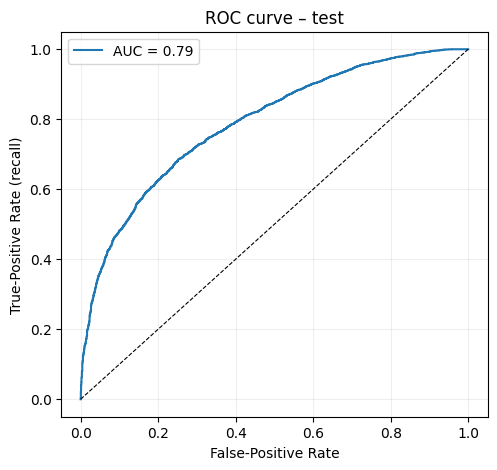

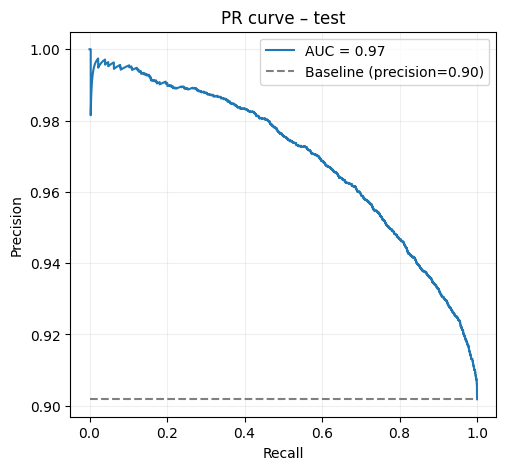


Threshold sweep on validation set (sorted by balanced-F1):


,thr,recall_0,prec_0,recall_1,prec_1,balF1
11,0.60,0.218783,0.343960,0.954540,0.918139,0.601718
12,0.65,0.601921,0.231148,0.781886,0.947450,0.595383
10,0.55,0.069370,0.601852,0.995001,0.907529,0.536828
13,0.70,0.808965,0.187022,0.616905,0.967366,0.528590
9,0.50,0.045891,0.781818,0.998605,0.905726,0.518297
8,0.45,0.040555,0.791667,0.998837,0.905269,0.513456
7,0.40,0.037353,0.833333,0.999186,0.905013,0.510636
6,0.35,0.033084,0.911765,0.999651,0.904672,0.506822
5,0.30,0.027748,0.962963,0.999884,0.904216,0.501794
4,0.25,0.024546,0.958333,0.999884,0.903931,0.498678



Chosen threshold (max balanced-F1) = 0.60

Confusion matrix (test):
[[  469  1404]
 [  681 16523]]


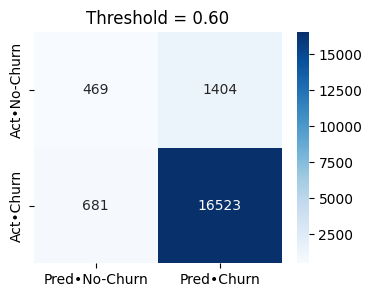


Classification report (test):
              precision    recall  f1-score   support

    No-Churn      0.408     0.250     0.310      1873
       Churn      0.922     0.960     0.941     17204

    accuracy                          0.891     19077
   macro avg      0.665     0.605     0.625     19077
weighted avg      0.871     0.891     0.879     19077



In [ ]:
## focal loss and class weight
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (roc_curve, roc_auc_score,
                             precision_recall_curve, average_precision_score,
                             classification_report, confusion_matrix,
                             precision_score, recall_score, f1_score)

# ───────────────────────────────────────────────────────────────
# 1) PROBABILITIES & AUC METRICS
# ───────────────────────────────────────────────────────────────
y_val_pred_prob  = model.predict(
        {"numeric_input": X_val_scaled,  "image_input": X_val_img},
        verbose=0).ravel()
y_test_pred_prob = model.predict(
        {"numeric_input": X_test_scaled, "image_input": X_test_img},
        verbose=0).ravel()

val_roc_auc  = roc_auc_score(y_val,  y_val_pred_prob)
val_pr_auc   = average_precision_score(y_val,  y_val_pred_prob)
test_roc_auc = roc_auc_score(y_test, y_test_pred_prob)
test_pr_auc  = average_precision_score(y_test, y_test_pred_prob)

print(f"Validation  ROC-AUC : {val_roc_auc:.3f} | PR-AUC : {val_pr_auc:.3f}")
print(f"Test        ROC-AUC : {test_roc_auc:.3f} | PR-AUC : {test_pr_auc:.3f}")

# ───────────────────────────────────────────────────────────────
# 2) ROC  &  PR CURVES  (test)
# ───────────────────────────────────────────────────────────────
# ROC
fpr, tpr, _ = roc_curve(y_test, y_test_pred_prob)
plt.figure(figsize=(5.5,5))
plt.plot(fpr, tpr, label=f"AUC = {test_roc_auc:.2f}")
plt.plot([0,1],[0,1],'k--', lw=0.8)
plt.xlabel("False-Positive Rate");  plt.ylabel("True-Positive Rate (recall)")
plt.title("ROC curve – test");      plt.legend();  plt.grid(alpha=.2);  plt.show()

# PR
prec, rec, _ = precision_recall_curve(y_test, y_test_pred_prob)
baseline = np.mean(y_test)
plt.figure(figsize=(5.5,5))
plt.plot(rec, prec, label=f"AUC = {test_pr_auc:.2f}")
plt.hlines(baseline, 0, 1, colors='gray', linestyles='--',
           label=f"Baseline (precision={baseline:.2f})")
plt.xlabel("Recall"); plt.ylabel("Precision"); plt.title("PR curve – test")
plt.legend(); plt.grid(alpha=.2); plt.show()

# ───────────────────────────────────────────────────────────────
# 3) THRESHOLD SWEEP  (validation set)
#    we scan 0.05 … 0.95 in 5-point steps
# ───────────────────────────────────────────────────────────────
scan_thr = np.linspace(0.05, 0.95, 19)
rows = []
for t in scan_thr:
    y_hat = (y_val_pred_prob >= t).astype(int)
    rec0  = recall_score   (y_val, y_hat, pos_label=0)
    prec0 = precision_score(y_val, y_hat, pos_label=0, zero_division=0)
    rec1  = recall_score   (y_val, y_hat, pos_label=1)
    prec1 = precision_score(y_val, y_hat, pos_label=1, zero_division=0)

    # balanced-F1  (average of class-specific F1)
    balF1 = (f1_score(y_val, y_hat, pos_label=0) +
             f1_score(y_val, y_hat, pos_label=1)) / 2

    rows.append([t, rec0, prec0, rec1, prec1, balF1])

tbl = pd.DataFrame(rows, columns=
        ["thr","recall_0","prec_0","recall_1","prec_1","balF1"])

print("\nThreshold sweep on validation set (sorted by balanced-F1):")
display(tbl.sort_values("balF1", ascending=False).head(20))

# choose threshold rule  👉  here: max balanced-F1
best_thr = tbl.loc[tbl["balF1"].idxmax(), "thr"]
print(f"\nChosen threshold (max balanced-F1) = {best_thr:.2f}")

# ───────────────────────────────────────────────────────────────
# 4) FINAL TEST-SET EVALUATION AT CHOSEN THRESHOLD
# ───────────────────────────────────────────────────────────────
y_test_pred = (y_test_pred_prob >= best_thr).astype(int)

cm = confusion_matrix(y_test, y_test_pred)
print("\nConfusion matrix (test):")
print(cm)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=["Pred•No-Churn","Pred•Churn"],
            yticklabels=["Act•No-Churn","Act•Churn"])
plt.title(f"Threshold = {best_thr:.2f}"); plt.ylabel(""); plt.xlabel("")
plt.show()

print("\nClassification report (test):")
print(classification_report(y_test, y_test_pred,
                            target_names=["No-Churn","Churn"],
                            digits=3))


# Long Short-Term Memory (LSTM) for Temporal Data


In [1]:
# prompt: mount from google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install -q keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 9.4 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, average_precision_score, confusion_matrix, classification_report, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
import keras_tuner as kt

In [ ]:
"""
End‑to‑end sequence construction pipeline
-----------------------------------------
* Loads the pre‑processed Olist checkout file.
* Aggregates to order‑level granularity (one row per order).
* Engineers:
    - item_count
    - one‑hot payment‑type flags
    - max_installments
    - days‑since‑previous‑order (inter‑purchase gap)
* Builds customer‑level sequences and pads to equal length.
"""

import pandas as pd
import numpy as np

# ------------------------------------------------------------------
# 0. PARAMETERS
# ------------------------------------------------------------------
RAW_PATH   = '/content/drive/MyDrive/Thesis/Datasets/full_data_preprocessed_checkpoint.csv'
DATE_COL   = 'order_purchase_timestamp'
PAY_TYPES  = ['credit_card', 'boleto', 'voucher', 'debit_card']   # adapt if needed
REVIEW_IMPUTE_VALUE = 0        # e.g. 0 → "no review"

# ------------------------------------------------------------------
# 1. LOAD ITEM‑LEVEL DATA (minimal columns)
# ------------------------------------------------------------------
use_cols = [
    'customer_unique_id', 'order_id', DATE_COL,
    'price', 'freight_value',
    'payment_type', 'payment_installments',
    'review_score'
]
orders = pd.read_csv(
    RAW_PATH,
    usecols     = use_cols,
    parse_dates = [DATE_COL]
)

# ------------------------------------------------------------------
# 2. AGGREGATE TO ORDER‑LEVEL
# ------------------------------------------------------------------
order_agg = (
    orders
      .groupby('order_id', as_index=False)        # keep order_id as column
      .agg(customer_unique_id      = ('customer_unique_id', 'first'),
           order_purchase_timestamp= (DATE_COL, 'first'),
           price                   = ('price', 'sum'),
           freight_value           = ('freight_value', 'sum'),
           payment_type            = ('payment_type', list),
           payment_installments    = ('payment_installments', list),
           review_score            = ('review_score', 'first'),
           item_count              = ('payment_type', 'size'))     # #rows == #items
)

# ------------------------------------------------------------------
# 3. FEATURE ENGINEERING
# ------------------------------------------------------------------
# 3.1 One‑hot payment‑type indicators
for p in PAY_TYPES:
    order_agg[f'pay_{p}'] = order_agg['payment_type'].apply(lambda lst: int(p in lst))

# 3.2 Maximum installments within the order
order_agg['max_installments'] = order_agg['payment_installments'].apply(
    lambda lst: max(lst) if lst else 1
)

# 3.3 Impute missing review scores
order_agg['review_score'] = order_agg['review_score'].fillna(REVIEW_IMPUTE_VALUE)

# 3.4 Chronological sort inside each customer
order_agg.sort_values(['customer_unique_id', 'order_purchase_timestamp'],
                      inplace=True)

# ------------------------------------------------------------------
# 4. CONSTRUCT CUSTOMER‑LEVEL SEQUENCES
# ------------------------------------------------------------------
sequences, customer_ids = [], []
for cust_id, grp in order_agg.groupby('customer_unique_id'):
    grp = grp.sort_values('order_purchase_timestamp')

    seq = []
    for _, row in grp.iterrows():
        features = [
            row['price'],
            row['freight_value'],
            row['item_count'],
            row['review_score'],
            row['max_installments']
        ] + [row[f'pay_{p}'] for p in PAY_TYPES]
        seq.append(features)

    customer_ids.append(cust_id)
    sequences.append(seq)


# ------------------------------------------------------------------
# 5. ZERO‑PAD TO A FIXED LENGTH TENSOR
# ------------------------------------------------------------------
max_seq_len  = max(len(seq) for seq in sequences)
num_features = 5 + len(PAY_TYPES)

X_seq_all = np.zeros((len(sequences), max_seq_len, num_features))

for i, seq in enumerate(sequences):
    seq_arr = np.asarray(seq, dtype=float)
    X_seq_all[i, :len(seq_arr), :] = seq_arr   # left‑aligned, zero‑padded

# ------------------------------------------------------------------
# 6. QUICK VALIDATION
# ------------------------------------------------------------------
print("Tensor shape  :", X_seq_all.shape)        # (customers, timesteps, features)
print("Feature names :", [
    'price', 'freight', 'item_count',
    'review_score', 'max_installments'
] + [f'pay_{p}' for p in PAY_TYPES])
print("Max sequence length :", max_seq_len)


Tensor shape  : (95381, 768, 9)
Feature names : ['price', 'freight', 'item_count', 'review_score', 'max_installments', 'pay_credit_card', 'pay_boleto', 'pay_voucher', 'pay_debit_card']
Max sequence length : 768


In [ ]:
# Load static customer features to get churn labels (and possibly to cross-verify or use directly)
customer_static = pd.read_csv('/content/drive/MyDrive/Thesis/Datasets/customer_df_rf.csv', usecols=['customer_unique_id', 'churn', 'last_purchase_date', 'recency_days'])
customer_static.set_index('customer_unique_id', inplace=True)

# Compute churn labels for our sequence data
y_all = []
for cust_id in customer_ids:
    if cust_id not in customer_static.index:
        # If a customer ID from sequence is not in static (unlikely if data sources match), skip or assume churn
        label = 1
    else:
        label = customer_static.loc[cust_id, 'churn']
    y_all.append(label)
y_all = np.array(y_all)

# (Alternatively, compute label by checking last purchase gap manually)
# Example manual approach (if not using customer_static):
# last_date = order_agg[order_agg['customer_unique_id'] == cust_id]['order_purchase_timestamp'].max()
# recency = (ref_date - last_date).days
# label = 1 if recency > 90 else 0


In [ ]:
# Prepare static feature matrix
static_features = ['avg_order_value', 'avg_review_score',
                   'any_bad_review', 'on_time_delivery_ratio', 'lat_norm', 'lng_norm', 'avg_order_approval_hours',
                   'avg_delivery_days', 'on_time_delivery_ratio', 'avg_review_answer_days',
                   'preferred_payment_type', 'avg_payment_installments', 'avg_freight_value', 'avg_review_response_days',
                   'avg_customer_seller_distance']
# Note: We include preferred_payment_type which is categorical
# We will one-hot encode preferred_payment_type
static_df = pd.read_csv('/content/drive/MyDrive/Thesis/Datasets/customer_df_rf.csv', usecols=['customer_unique_id'] + static_features)
static_df.set_index('customer_unique_id', inplace=True)

# One-hot encode 'preferred_payment_type'
static_df = pd.get_dummies(static_df, columns=['preferred_payment_type'], prefix='pref_pay')

# Align static features with our sequence list order
X_static_all = []
for cust_id in customer_ids:
    # If customer not in static_df (should not happen if data is consistent), handle gracefully
    if cust_id in static_df.index:
        X_static_all.append(static_df.loc[cust_id].values.astype(float))
    else:
        X_static_all.append(np.zeros(static_df.shape[1]))  # placeholder if missing
X_static_all = np.stack(X_static_all)

# Optionally, scale static features (e.g., StandardScaler or MinMaxScaler)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_static_all = scaler.fit_transform(X_static_all)


In [ ]:
# Determine class imbalance
import numpy as np
n_churn = np.sum(y_all == 1)
n_not_churn = np.sum(y_all == 0)
print(f"Churners: {n_churn}, Non-churners: {n_not_churn}")

# Compute class weights as inverse of frequency
total = len(y_all)
weight_for_churn = total / (2 * n_churn)
weight_for_not_churn = total / (2 * n_not_churn)
class_weight = {0: weight_for_not_churn, 1: weight_for_churn}
print("Class weight:", class_weight)


Churners: 86015, Non-churners: 9366
Class weight: {0: np.float64(5.091874866538544), 1: np.float64(0.5544439923269198)}


In [ ]:
from tensorflow.keras.layers import Input, LSTM, Bidirectional, Dense, Dropout, Masking, concatenate
from tensorflow.keras.models import Model

def build_lstm_model(seq_input_shape, static_input_shape=None,
                     num_lstm_layers=1, units_per_layer=[64], bidirectional=False, dropout_rate=0.0):
    """
    Build an LSTM model with given architecture parameters.
    seq_input_shape: tuple for sequence input (max_seq_len, num_features)
    static_input_shape: tuple for static input features (num_static_features,), or None if not used
    num_lstm_layers: how many LSTM layers to stack
    units_per_layer: list of LSTM units for each layer (length should == num_lstm_layers)
    bidirectional: whether to use Bidirectional LSTM for each layer
    dropout_rate: dropout to apply after each LSTM layer (except maybe last) and on final dense layer
    """
    # Define sequence input
    seq_input = Input(shape=seq_input_shape, name="sequence_input")
    x = Masking(mask_value=0.0, name="masking_layer")(seq_input)  # ignore padded zeros

    # Add LSTM layers
    for i in range(num_lstm_layers):
        units = units_per_layer[i]
        if bidirectional:
            x = Bidirectional(LSTM(units, return_sequences=(i < num_lstm_layers - 1),
                                    name=f"LSTM_layer_{i+1}",))(x)
        else:
            x = LSTM(units, return_sequences=(i < num_lstm_layers - 1), name=f"LSTM_layer_{i+1}")(x)
        # Apply dropout between layers if specified
        if dropout_rate > 0.0:
            x = Dropout(dropout_rate, name=f"dropout_layer_{i+1}")(x)

    # If static features are provided, define static input and concatenate
    if static_input_shape:
        static_input = Input(shape=static_input_shape, name="static_input")
        # (Optionally, you could add a Dense layer here to transform static input if needed)
        combined = concatenate([x, static_input], name="concatenate_layer")
    else:
        static_input = None
        combined = x

    # Add a fully connected layer after concatenation (if desired)
    combined = Dense(64, activation='relu', name="dense_after_concat")(combined)
    if dropout_rate > 0.0:
        combined = Dropout(dropout_rate, name="dropout_after_concat")(combined)
    # Output layer
    output = Dense(1, activation='sigmoid', name="output_layer")(combined)

    # Build the model
    if static_input_shape:
        model = Model(inputs=[seq_input, static_input], outputs=output)
    else:
        model = Model(inputs=seq_input, outputs=output)
    return model

# Example: a 2-layer Bidirectional LSTM model
example_model = build_lstm_model(seq_input_shape=(max_seq_len, num_features),
                                 static_input_shape=(X_static_all.shape[1],),
                                 num_lstm_layers=2, units_per_layer=[64, 32], bidirectional=True, dropout_rate=0.2)
example_model.summary()



Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ sequence_input      │ (None, 768, 9)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_2         │ (None, 768, 9)    │          0 │ sequence_input[0… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ masking_layer       │ (None, 768, 9)    │          0 │ sequence_input[0… │
│ (Masking)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ any_2 (Any)         │ (None, 768)       │          0 │ not_equal_2[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 768, 128)  │     37,888 │ masking_layer[0]… │
│ (Bidirectional)     │                   │            │ any_2[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_layer_1     │ (None, 768, 128)  │          0 │ bidirectional[0]… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 64)        │     41,216 │ dropout_layer_1[… │
│ (Bidirectional)     │                   │            │ any_2[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_layer_2     │ (None, 64)        │          0 │ bidirectional_1[… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ static_input        │ (None, 19)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_layer   │ (None, 83)        │          0 │ dropout_layer_2[… │
│ (Concatenate)       │                   │            │ static_input[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_after_concat  │ (None, 64)        │      5,376 │ concatenate_laye… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_after_conc… │ (None, 64)        │          0 │ dense_after_conc… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_layer        │ (None, 1)         │         65 │ dropout_after_co… │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 84,545 (330.25 KB)

 Trainable params: 84,545 (330.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from sklearn.preprocessing import StandardScaler

seq_scaler = StandardScaler()
num_seq_features = 5        # first five columns are numeric

# flatten -> fit scaler -> reshape
flat = X_seq_all[:, :, :num_seq_features].reshape(-1, num_seq_features)
flat = seq_scaler.fit_transform(flat)
X_seq_all[:, :, :num_seq_features] = flat.reshape(X_seq_all.shape[0],
                                                 X_seq_all.shape[1],
                                                 num_seq_features)


In [ ]:
from sklearn.model_selection import train_test_split

# First, combine X_seq_all and X_static_all into appropriate structures
# (We already have them as numpy arrays.)

X_seq_train, X_seq_temp, X_static_train, X_static_temp, y_train, y_temp = train_test_split(
    X_seq_all, X_static_all, y_all, test_size=0.30, stratify=y_all, random_state=42)
# Now split the temp (30%) into val and test equally (15% each of total, i.e., 50/50 split of temp)
X_seq_val, X_seq_test, X_static_val, X_static_test, y_val, y_test = train_test_split(
    X_seq_temp, X_static_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42)
print("Shapes:", X_seq_train.shape, X_seq_val.shape, X_seq_test.shape)
print("Churn rate in train: ", y_train.mean(),
      "val:", y_val.mean(), "test:", y_test.mean())


Shapes: (66766, 768, 9) (14307, 768, 9) (14308, 768, 9)
Churn rate in train:  0.9018063086001857 val: 0.9017963234780177 test: 0.9018031870282359


In [ ]:
import keras_tuner as kt
from tensorflow.keras import backend as K

def focal_loss(gamma=2., alpha=0.25):
    def _fl(y_true, y_pred):
        y_true = K.cast(y_true, K.floatx())
        # ❶ clip to prevent log(0)
        y_pred = K.clip(y_pred, K.epsilon(), 1. - K.epsilon())

        bce = K.binary_crossentropy(y_true, y_pred)
        pt  = K.exp(-bce)
        loss = alpha * K.pow(1. - pt, gamma) * bce
        # ❷ replace any remaining NaN/Inf with finite numbers
        loss = tf.where(tf.math.is_finite(loss), loss, tf.zeros_like(loss))
        return K.mean(loss)
    return _fl

# Hyperparameter tuning setup corrected
def build_model(hp):
    num_layers = hp.Int('num_lstm_layers', 1, 2, step=1)
    units = [hp.Choice(f'units_layer{i+1}', [32, 64]) for i in range(num_layers)]
    bidir = hp.Boolean('bidirectional')
    dropout_rate = hp.Float('dropout_rate', 0.0, 0.3, step=0.1)
    learning_rate = hp.Choice('learning_rate', [3e-4, 1e-4, 5e-5, 1e-5])

    model = build_lstm_model(
        seq_input_shape=(max_seq_len, num_features),
        static_input_shape=(X_static_all.shape[1],),
        num_lstm_layers=num_layers,
        units_per_layer=units,
        bidirectional=bidir,
        dropout_rate=dropout_rate
    )

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss=focal_loss(gamma=2., alpha=0.25),  # ✅ Use focal loss
        metrics=[
            tf.keras.metrics.AUC(name='AUC'),
            'accuracy',
            tf.keras.metrics.Precision(name='precision'),
            tf.keras.metrics.Recall(name='recall')
        ]
    )

    return model

tuner = kt.Hyperband(
    build_model,
    objective='val_AUC',
    max_epochs=10,
    factor=3,
    directory='kt_tuning',
    project_name='olist_churn_lstm'
)

# Run tuner WITHOUT class_weight
tuner.search(
    [X_seq_train, X_static_train], y_train,
    validation_data=([X_seq_val, X_static_val], y_val),
    epochs=20, batch_size=128,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            patience=3, restore_best_weights=True,
            monitor='val_AUC', mode='max'
        )
    ]
)

# Best hyperparameters from tuning
best_model = tuner.get_best_models(1)[0]

Trial 30 Complete [00h 04m 46s]
val_AUC: 0.7490549087524414

Best val_AUC So Far: 0.7741006016731262
Total elapsed time: 01h 10m 40s


In [ ]:
# Predict and evaluate directly from best_model
y_proba = best_model.predict([X_seq_test, X_static_test]).ravel()
roc_auc = roc_auc_score(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)

448/448 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step


In [ ]:
# Find optimal threshold on validation (for example, maximize F1)
precision, recall, thresholds = precision_recall_curve(y_val, best_model.predict([X_seq_val, X_static_val]).ravel())
f1 = 2*(precision*recall)/(precision+recall+1e-8)
best_thresh = thresholds[np.argmax(f1)]
print(f"Optimal threshold: {best_thresh:.3f}")
best_thresh = 0.6
# Apply threshold to test set
y_pred = (y_proba >= best_thresh).astype(int)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

# Confusion matrix and classification report at this threshold
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))

448/448 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step
Optimal threshold: 0.492
              precision    recall  f1-score   support

           0       0.34      0.25      0.29      1405
           1       0.92      0.95      0.93     12903

    accuracy                           0.88     14308
   macro avg       0.63      0.60      0.61     14308
weighted avg       0.86      0.88      0.87     14308

Confusion Matrix:
 [[  353  1052]
 [  687 12216]]
Classification Report:
               precision    recall  f1-score   support

           0     0.3394    0.2512    0.2888      1405
           1     0.9207    0.9468    0.9336     12903

    accuracy                         0.8785     14308
   macro avg     0.6301    0.5990    0.6112     14308
weighted avg     0.8636    0.8785    0.8702     14308



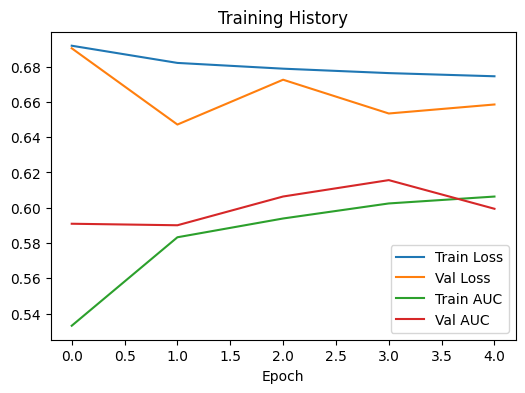

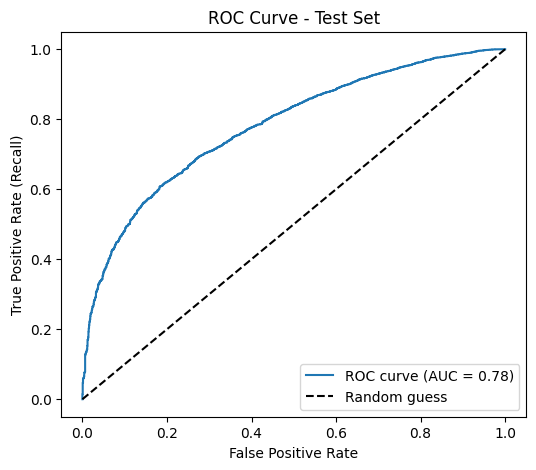

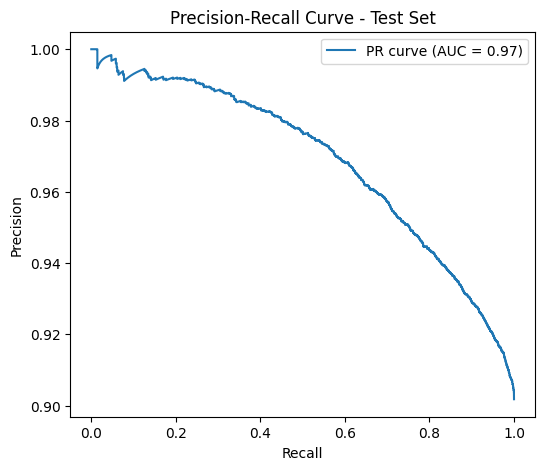

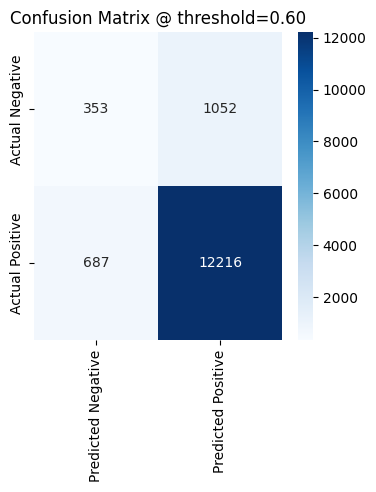

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Training history plot
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.plot(history.history.get('AUC', []), label='Train AUC')
plt.plot(history.history.get('val_AUC', []), label='Val AUC')
plt.title('Training History')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# 2. ROC curve plot
from sklearn.metrics import roc_curve, precision_recall_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc_val = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - Test Set')
plt.legend(loc='lower right')
plt.show()

# 3. Precision-Recall curve plot
precision, recall, _ = precision_recall_curve(y_test, y_proba)
pr_auc_val = auc(recall, precision)
plt.figure(figsize=(6,5))
plt.plot(recall, precision, label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Test Set')
plt.legend(loc='upper right')
plt.show()

# 4. Confusion matrix heatmap
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative','Predicted Positive'],
            yticklabels=['Actual Negative','Actual Positive'])
plt.title(f'Confusion Matrix @ threshold={best_thresh:.2f}')
plt.show()


# CNN + LSTM


In [ ]:
# prompt: mount from google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install -q keras-tuner


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, average_precision_score, confusion_matrix, classification_report, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
import keras_tuner as kt
import numpy as np

In [ ]:
# ─── load 32×32×1 images ─────────────────────────────────────────
customer_images = np.load('/content/drive/MyDrive/Thesis/Datasets/customer_image_fine.npy')

# sanity
print("Images:", customer_images.shape, customer_images.min(), customer_images.max())

Images: (95381, 32, 32, 1) 0.0 1.0


In [ ]:
"""
End‑to‑end sequence construction pipeline
-----------------------------------------
* Loads the pre‑processed Olist checkout file.
* Aggregates to order‑level granularity (one row per order).
* Engineers:
    - item_count
    - one‑hot payment‑type flags
    - max_installments
    - days‑since‑previous‑order (inter‑purchase gap)
* Builds customer‑level sequences and pads to equal length.
"""

import pandas as pd
import numpy as np

# ------------------------------------------------------------------
# 0. PARAMETERS
# ------------------------------------------------------------------
RAW_PATH   = '/content/drive/MyDrive/Thesis/Datasets/full_data_preprocessed_checkpoint.csv'
DATE_COL   = 'order_purchase_timestamp'
PAY_TYPES  = ['credit_card', 'boleto', 'voucher', 'debit_card']   # adapt if needed
REVIEW_IMPUTE_VALUE = 0        # e.g. 0 → "no review"

# ------------------------------------------------------------------
# 1. LOAD ITEM‑LEVEL DATA (minimal columns)
# ------------------------------------------------------------------
use_cols = [
    'customer_unique_id', 'order_id', DATE_COL,
    'price', 'freight_value',
    'payment_type', 'payment_installments',
    'review_score'
]
orders = pd.read_csv(
    RAW_PATH,
    usecols     = use_cols,
    parse_dates = [DATE_COL]
)

# ------------------------------------------------------------------
# 2. AGGREGATE TO ORDER‑LEVEL
# ------------------------------------------------------------------
order_agg = (
    orders
      .groupby('order_id', as_index=False)        # keep order_id as column
      .agg(customer_unique_id      = ('customer_unique_id', 'first'),
           order_purchase_timestamp= (DATE_COL, 'first'),
           price                   = ('price', 'sum'),
           freight_value           = ('freight_value', 'sum'),
           payment_type            = ('payment_type', list),
           payment_installments    = ('payment_installments', list),
           review_score            = ('review_score', 'first'),
           item_count              = ('payment_type', 'size'))     # #rows == #items
)

# ------------------------------------------------------------------
# 3. FEATURE ENGINEERING
# ------------------------------------------------------------------
# 3.1 One‑hot payment‑type indicators
for p in PAY_TYPES:
    order_agg[f'pay_{p}'] = order_agg['payment_type'].apply(lambda lst: int(p in lst))

# 3.2 Maximum installments within the order
order_agg['max_installments'] = order_agg['payment_installments'].apply(
    lambda lst: max(lst) if lst else 1
)

# 3.3 Impute missing review scores
order_agg['review_score'] = order_agg['review_score'].fillna(REVIEW_IMPUTE_VALUE)

# 3.4 Chronological sort inside each customer
order_agg.sort_values(['customer_unique_id', 'order_purchase_timestamp'],
                      inplace=True)

# ------------------------------------------------------------------
# 4. CONSTRUCT CUSTOMER‑LEVEL SEQUENCES
# ------------------------------------------------------------------
sequences, customer_ids = [], []
for cust_id, grp in order_agg.groupby('customer_unique_id'):
    grp = grp.sort_values('order_purchase_timestamp')

    seq = []
    for _, row in grp.iterrows():
        features = [
            row['price'],
            row['freight_value'],
            row['item_count'],
            row['review_score'],
            row['max_installments']
        ] + [row[f'pay_{p}'] for p in PAY_TYPES]
        seq.append(features)

    customer_ids.append(cust_id)
    sequences.append(seq)


# ------------------------------------------------------------------
# 5. ZERO‑PAD TO A FIXED LENGTH TENSOR
# ------------------------------------------------------------------
max_seq_len  = max(len(seq) for seq in sequences)
num_features = 5 + len(PAY_TYPES)

X_seq_all = np.zeros((len(sequences), max_seq_len, num_features))

for i, seq in enumerate(sequences):
    seq_arr = np.asarray(seq, dtype=float)
    X_seq_all[i, :len(seq_arr), :] = seq_arr   # left‑aligned, zero‑padded

# ------------------------------------------------------------------
# 6. QUICK VALIDATION
# ------------------------------------------------------------------
print("Tensor shape  :", X_seq_all.shape)        # (customers, timesteps, features)
print("Feature names :", [
    'price', 'freight', 'item_count',
    'review_score', 'max_installments'
] + [f'pay_{p}' for p in PAY_TYPES])
print("Max sequence length :", max_seq_len)


Tensor shape  : (95381, 768, 9)
Feature names : ['price', 'freight', 'item_count', 'review_score', 'max_installments', 'pay_credit_card', 'pay_boleto', 'pay_voucher', 'pay_debit_card']
Max sequence length : 768


In [ ]:
# Load static customer features to get churn labels (and possibly to cross-verify or use directly)
customer_static = pd.read_csv('/content/drive/MyDrive/Thesis/Datasets/customer_df_rf.csv', usecols=['customer_unique_id', 'churn', 'last_purchase_date', 'recency_days'])
customer_static.set_index('customer_unique_id', inplace=True)

# Compute churn labels for our sequence data
y_all = []
for cust_id in customer_ids:
    if cust_id not in customer_static.index:
        # If a customer ID from sequence is not in static (unlikely if data sources match), skip or assume churn
        label = 1
    else:
        label = customer_static.loc[cust_id, 'churn']
    y_all.append(label)
y_all = np.array(y_all)

# (Alternatively, compute label by checking last purchase gap manually)
# Example manual approach (if not using customer_static):
# last_date = order_agg[order_agg['customer_unique_id'] == cust_id]['order_purchase_timestamp'].max()
# recency = (ref_date - last_date).days
# label = 1 if recency > 90 else 0


In [ ]:
# Prepare static feature matrix
static_features = ['avg_order_value', 'avg_review_score',
                   'any_bad_review', 'on_time_delivery_ratio', 'lat_norm', 'lng_norm', 'avg_order_approval_hours',
                   'avg_delivery_days', 'on_time_delivery_ratio', 'avg_review_answer_days',
                   'preferred_payment_type', 'avg_payment_installments', 'avg_freight_value', 'avg_review_response_days',
                   'avg_customer_seller_distance']
# Note: We include preferred_payment_type which is categorical
# We will one-hot encode preferred_payment_type
static_df = pd.read_csv('/content/drive/MyDrive/Thesis/Datasets/customer_df_rf.csv', usecols=['customer_unique_id'] + static_features)
static_df.set_index('customer_unique_id', inplace=True)

# One-hot encode 'preferred_payment_type'
static_df = pd.get_dummies(static_df, columns=['preferred_payment_type'], prefix='pref_pay')

# Align static features with our sequence list order
X_static_all = []
for cust_id in customer_ids:
    # If customer not in static_df (should not happen if data is consistent), handle gracefully
    if cust_id in static_df.index:
        X_static_all.append(static_df.loc[cust_id].values.astype(float))
    else:
        X_static_all.append(np.zeros(static_df.shape[1]))  # placeholder if missing
X_static_all = np.stack(X_static_all)

# Optionally, scale static features (e.g., StandardScaler or MinMaxScaler)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_static_all = scaler.fit_transform(X_static_all)


In [ ]:
# Determine class imbalance
import numpy as np
n_churn = np.sum(y_all == 1)
n_not_churn = np.sum(y_all == 0)
print(f"Churners: {n_churn}, Non-churners: {n_not_churn}")

# Compute class weights as inverse of frequency
total = len(y_all)
weight_for_churn = total / (2 * n_churn)
weight_for_not_churn = total / (2 * n_not_churn)
class_weight = {0: weight_for_not_churn, 1: weight_for_churn}
print("Class weight:", class_weight)


Churners: 86015, Non-churners: 9366
Class weight: {0: np.float64(5.091874866538544), 1: np.float64(0.5544439923269198)}


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, BatchNormalization

def cnn_branch(img_input, hp=None):
    # 1st conv block
    filters1 = hp.Int('conv_filters1', 16, 64, step=16) if hp else 32
    x = Conv2D(filters1, 3, activation='relu', padding='same')(img_input)
    x = MaxPool2D()(x)                 # 32→16
    x = BatchNormalization()(x)

    # 2nd conv block  (always keep for 32×32)
    filters2 = hp.Int('conv_filters2', 32, 128, step=32) if hp else 64
    x = Conv2D(filters2, 3, activation='relu', padding='same')(x)
    x = MaxPool2D()(x)                 # 16→8
    x = BatchNormalization()(x)

    # Optional 3rd block controlled by hyper‑param
    if hp and hp.Boolean('third_conv'):
        filters3 = hp.Int('conv_filters3', 32, 128, step=32)
        x = Conv2D(filters3, 3, activation='relu', padding='same')(x)
        x = MaxPool2D()(x)             # 8→4
        x = BatchNormalization()(x)

    x = Flatten()(x)                   # 4×4×filters → manageable
    return x


In [ ]:
from tensorflow.keras.layers import Input, LSTM, Bidirectional, Dense, Dropout, Masking, concatenate
from tensorflow.keras.models import Model


def build_hybrid_model(seq_input_shape, static_input_shape, img_input_shape,
                       num_lstm_layers=1, units_per_layer=[64],
                       bidirectional=False, dropout_rate=0.0, hp=None):
    """
    Build an LSTM model with given architecture parameters.
    seq_input_shape: tuple for sequence input (max_seq_len, num_features)
    static_input_shape: tuple for static input features (num_static_features,), or None if not used
    num_lstm_layers: how many LSTM layers to stack
    units_per_layer: list of LSTM units for each layer (length should == num_lstm_layers)
    bidirectional: whether to use Bidirectional LSTM for each layer
    dropout_rate: dropout to apply after each LSTM layer (except maybe last) and on final dense layer
    """
    # Define sequence input
    seq_input = Input(shape=seq_input_shape, name="sequence_input")
    x = Masking(mask_value=0.0, name="masking_layer")(seq_input)  # ignore padded zeros

    # Add LSTM layers
    for i in range(num_lstm_layers):
        units = units_per_layer[i]
        if bidirectional:
            x = Bidirectional(LSTM(units, return_sequences=(i < num_lstm_layers - 1),
                                    name=f"LSTM_layer_{i+1}",))(x)
        else:
            x = LSTM(units, return_sequences=(i < num_lstm_layers - 1), name=f"LSTM_layer_{i+1}")(x)
        # Apply dropout between layers if specified
        if dropout_rate > 0.0:
            x = Dropout(dropout_rate, name=f"dropout_layer_{i+1}")(x)

    # If static features are provided, define static input and concatenate
    if static_input_shape:
        static_input = Input(shape=static_input_shape, name="static_input")
        # (Optionally, you could add a Dense layer here to transform static input if needed)
        combined = concatenate([x, static_input], name="concatenate_layer")
    else:
        static_input = None
        combined = x

    # ➌ CNN branch (new)
    img_input = Input(shape=img_input_shape, name="image_input")
    x_img = cnn_branch(img_input, hp)

    # ➍ concatenate
    merged = concatenate([x, static_input, x_img])
    merged = Dense(64, activation='relu')(merged)
    if dropout_rate > 0.0:
        merged = Dropout(dropout_rate)(merged)
    output = Dense(1, activation='sigmoid')(merged)

    return Model(inputs=[seq_input, static_input, img_input], outputs=output)



In [ ]:
# ==============================================================
# 0.  Numeric columns in the order‑sequence tensor
# ==============================================================
NUM_SEQ_FEATURES = 5               # first 5 columns are numeric

# ==============================================================
# 1.  Static‑feature cleaning *before* the split
#    • boolean→int → log‑transform → clip 99th pct
# ==============================================================
bool_cols = static_df.select_dtypes(bool).columns
static_df[bool_cols] = static_df[bool_cols].astype(int)

for col in ['avg_order_value','avg_order_approval_hours',
            'avg_customer_seller_distance','avg_freight_value']:
    static_df[col] = np.log1p(static_df[col])

for col in ['avg_delivery_days','avg_review_answer_days','avg_review_response_days']:
    p99 = static_df[col].quantile(0.99)
    static_df[col] = np.clip(static_df[col], None, p99)

# align & cast
X_static_all = static_df.reindex(customer_ids).astype('float32')

# ==============================================================
# 2.  Train / Val / Test split  (70 / 15 / 15), stratified
# ==============================================================
from sklearn.model_selection import train_test_split

X_seq_train, X_seq_temp, \
X_static_train_raw, X_static_temp_raw, \
X_img_train, X_img_temp, \
y_train, y_temp = train_test_split(
        X_seq_all, X_static_all, customer_images, y_all,
        test_size=0.30, stratify=y_all, random_state=42)

X_seq_val, X_seq_test, \
X_static_val_raw, X_static_test_raw, \
X_img_val, X_img_test, \
y_val, y_test = train_test_split(
        X_seq_temp, X_static_temp_raw, X_img_temp, y_temp,
        test_size=0.50, stratify=y_temp, random_state=42)

print("Shapes:", X_seq_train.shape, X_seq_val.shape, X_seq_test.shape)
print("Churn rates  train:", y_train.mean(),
      " val:", y_val.mean(), " test:", y_test.mean())

# ==============================================================
# 3.  Static  – fill NaNs with TRAIN mean  → RobustScaler
# ==============================================================
train_mean = X_static_train_raw.mean()
X_static_train_filled = X_static_train_raw.fillna(train_mean)
X_static_val_filled   = X_static_val_raw.fillna(train_mean)
X_static_test_filled  = X_static_test_raw.fillna(train_mean)

from sklearn.preprocessing import RobustScaler
stat_scaler = RobustScaler()
X_static_train = stat_scaler.fit_transform(X_static_train_filled)
X_static_val   = stat_scaler.transform(X_static_val_filled)
X_static_test  = stat_scaler.transform(X_static_test_filled)

# ==============================================================
# 4.  Sequence  – fit StandardScaler on *TRAIN* numeric slice
#     then transform val/test (no leakage)
# ==============================================================
from sklearn.preprocessing import StandardScaler
seq_scaler = StandardScaler()

flat_train = X_seq_train[:, :, :NUM_SEQ_FEATURES].reshape(-1, NUM_SEQ_FEATURES)
seq_scaler.fit(flat_train)

def scale_seq(arr):
    flat = arr[:, :, :NUM_SEQ_FEATURES].reshape(-1, NUM_SEQ_FEATURES)
    arr[:, :, :NUM_SEQ_FEATURES] = seq_scaler.transform(flat)\
                                             .reshape(arr.shape[0], -1, NUM_SEQ_FEATURES)
    return arr

X_seq_train = scale_seq(X_seq_train)
X_seq_val   = scale_seq(X_seq_val)
X_seq_test  = scale_seq(X_seq_test)

# ==============================================================
# 5.  Sanity checks
# ==============================================================
print("Static NaN:", np.isnan(X_static_train).any(),
      "Inf:", np.isinf(X_static_train).any())
print("Seq   NaN:", np.isnan(X_seq_train).any(axis=(1,2)).any())
print("Final shapes:", X_seq_train.shape, X_static_train.shape, X_img_train.shape)


Shapes: (66766, 768, 9) (14307, 768, 9) (14308, 768, 9)
Churn rates  train: 0.9018063086001857  val: 0.9017963234780177  test: 0.9018031870282359
Static NaN: False Inf: False
Seq   NaN: False
Final shapes: (66766, 768, 9) (66766, 19) (66766, 32, 32, 1)


In [ ]:
import numpy as np, tensorflow as tf

# 1️⃣ Label shape / dtype
for name, y in [("train", y_train), ("val", y_val)]:
    print(f"{name}: shape {y.shape}, dtype {y.dtype}, pos_rate {y.mean():.3f}")

#  — labels must be float32 and shape (N,1) —
y_train = y_train.astype('float32').reshape(-1, 1)
y_val   = y_val.astype('float32').reshape(-1, 1)
y_test  = y_test.astype('float32').reshape(-1, 1)

# 2️⃣ NaN / Inf / crazy ranges in all inputs
def check(arr, tag):
    print(f"{tag:7s}  NaN? {np.isnan(arr).any()}  Inf? {np.isinf(arr).any()}  "
          f"range [{arr.min():.3g}, {arr.max():.3g}]")
check(X_seq_train,   "seq")
check(X_static_train,"static")
check(X_img_train,   "img")

# 3️⃣ Are all sequences zero after masking?
all_zero_pct = np.all(X_seq_train == 0, axis=(1,2)).mean()
print("100 %‑zero padded sequences:", all_zero_pct)


train: shape (66766,), dtype int64, pos_rate 0.902
val: shape (14307,), dtype int64, pos_rate 0.902
seq      NaN? False  Inf? False  range [-0.0351, 1.44e+03]
static   NaN? False  Inf? False  range [-6.61, 18.9]
img      NaN? False  Inf? False  range [0, 1]
100 %‑zero padded sequences: 0.0


In [ ]:
# convert to float32 and 2‑D
y_train = y_train.astype('float32').reshape(-1, 1)
y_val   = y_val.astype('float32').reshape(-1, 1)
y_test  = y_test.astype('float32').reshape(-1, 1)


In [ ]:
import keras_tuner as kt
from tensorflow.keras import backend as K

def focal_loss(gamma=2., alpha=0.25):
    def _fl(y_true, y_pred):
        y_true = K.cast(y_true, K.floatx())
        # ❶ clip to prevent log(0)
        y_pred = K.clip(y_pred, K.epsilon(), 1. - K.epsilon())

        bce = K.binary_crossentropy(y_true, y_pred)
        pt  = K.exp(-bce)
        loss = alpha * K.pow(1. - pt, gamma) * bce
        # ❷ replace any remaining NaN/Inf with finite numbers
        loss = tf.where(tf.math.is_finite(loss), loss, tf.zeros_like(loss))
        return K.mean(loss)
    return _fl

# Hyperparameter tuning setup corrected
def build_model(hp):
    num_layers = hp.Int('num_lstm_layers', 1, 2)
    units = [hp.Choice(f'units_{i}', [32, 64]) for i in range(num_layers)]
    bidir = hp.Boolean('bidirectional')
    dropout_rate = hp.Float('dropout', 0.0, 0.3, step=0.1)


    model = build_hybrid_model(
        seq_input_shape=(max_seq_len, num_features),
        static_input_shape=(X_static_all.shape[1],),
        img_input_shape=X_img_train.shape[1:],
        num_lstm_layers=num_layers,
        units_per_layer=units,
        bidirectional=bidir,
        dropout_rate=dropout_rate,
        hp=hp
    )
# ── cosine‑decay LR schedule ──────────────────────────
    init_lr   = hp.Choice('lr_init', [3e-4, 1e-4, 5e-5])
    decay_steps = 30 * (len(X_seq_train) // 128)   # 30 epochs × steps/epoch
    lr_sched = tf.keras.optimizers.schedules.CosineDecay(
                   initial_learning_rate = init_lr,
                   decay_steps           = decay_steps,
                   alpha                 = 1e-5 / init_lr)   # final LR ≈1e‑5

    model.compile(
        optimizer=tf.keras.optimizers.Adam(lr_sched),
        loss=focal_loss(gamma=1.5, alpha=0.75),
        metrics=[tf.keras.metrics.AUC(name='AUC')]
    )
    return model


tuner = kt.Hyperband(
    build_model,
    objective='val_AUC',
    max_epochs=30,
    factor=2,
    directory='kt_tuning',
    project_name='olist_churn_hybrid'
)

# Run tuner WITHOUT class_weight
tuner.search(
    [X_seq_train, X_static_train, X_img_train], y_train,
    validation_data=([X_seq_val, X_static_val, X_img_val], y_val),
    epochs=20, batch_size=128,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            patience=3, restore_best_weights=True,
            monitor='val_AUC', mode='max'
        )
    ]
)

# Best hyperparameters from tuning
best_model = tuner.get_best_models(1)[0]

Trial 92 Complete [00h 14m 09s]
val_AUC: 0.7722394466400146

Best val_AUC So Far: 0.7835360765457153
Total elapsed time: 05h 28m 45s


In [ ]:
import os, datetime, pandas as pd
from sklearn.metrics import (roc_auc_score, average_precision_score)

# 1️⃣  model
best_model = tuner.get_best_models(1)[0]

SAVE_DIR  = "/content/drive/MyDrive/Thesis"
os.makedirs(SAVE_DIR, exist_ok=True)
MODEL_PATH = f"{SAVE_DIR}/hybrid_best_auc.keras"   # Keras v3 format

best_model.save(MODEL_PATH)       # no need for custom_objects with .keras
print("Model saved to:", MODEL_PATH)

# 2️⃣  metrics on test set
y_proba = best_model.predict([X_seq_test, X_static_test, X_img_test]).ravel()
metrics = {
    "timestamp" : datetime.datetime.utcnow().isoformat(timespec='seconds'),
    "roc_auc"   : roc_auc_score(y_test, y_proba),
    "pr_auc"    : average_precision_score(y_test, y_proba)
}
log_path = f"{SAVE_DIR}/metrics_log.csv"
pd.DataFrame([metrics]).to_csv(log_path, mode='a', index=False)
print("Metrics appended to:", log_path)

Model saved to: /content/drive/MyDrive/Thesis/hybrid_best_auc.keras
448/448 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step
Metrics appended to: /content/drive/MyDrive/Thesis/metrics_log.csv


In [ ]:
# 1️⃣  grab top‑3 models from the tuner
top3 = tuner.get_best_models(num_models=3)        # returns list of Models
for i, m in enumerate(top3, start=1):
    print(f"Model {i}  val_AUC = {m.evaluate([X_seq_val, X_static_val, X_img_val], y_val, verbose=0)[1]:.4f}")

# 2️⃣  helper that averages their predictions
def ensemble_predict(seq, stat, img, models=top3, bs=256):
    preds = [m.predict([seq, stat, img], batch_size=bs).ravel() for m in models]
    return np.mean(preds, axis=0)

# 3️⃣  evaluate on the test set
y_proba_ens = ensemble_predict(X_seq_test, X_static_test, X_img_test)
print("Ensemble ROC‑AUC:", roc_auc_score(y_test, y_proba_ens))
print("Ensemble PR‑AUC :", average_precision_score(y_test, y_proba_ens))

# 4️⃣  (optional) save ensemble probs for later analysis
np.save("/content/drive/MyDrive/Thesis/y_proba_ensemble.npy", y_proba_ens)

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 1 variables whereas the saved optimizer has 57 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model 1  val_AUC = 0.7836
Model 2  val_AUC = 0.7817
Model 3  val_AUC = 0.7805
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step
Ensemble ROC‑AUC: 0.7896433917130916
Ensemble PR‑AUC : 0.9707319445683573


In [ ]:
# 0️⃣  make sure labels are float32 column vectors
y_train = y_train.astype('float32').reshape(-1, 1)
y_val   = y_val.astype('float32').reshape(-1, 1)

# 1️⃣  compile with focal‑loss (α=0.75, γ=1.25)
best_model.compile(
    optimizer=tf.keras.optimizers.Adam(5e-5),
    loss=focal_loss(alpha=0.75, gamma=1.25),
    metrics=[tf.keras.metrics.AUC(name='AUC')]
)

# 2️⃣  callbacks
es   = tf.keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True,
                                        monitor='val_AUC', mode='max')
ckpt = tf.keras.callbacks.ModelCheckpoint(
        "/content/drive/MyDrive/Thesis/fine_focal.keras",
        monitor='val_AUC', save_best_only=True, mode='max')

# 3️⃣  fine‑tune 3–5 epochs
best_model.fit([X_seq_train, X_static_train, X_img_train], y_train,
               validation_data=([X_seq_val, X_static_val, X_img_val], y_val),
               epochs=5, batch_size=128,
               callbacks=[es, ckpt], verbose=2)


Epoch 1/5
522/522 - 56s - 108ms/step - AUC: 0.7724 - loss: 0.0928 - val_AUC: 0.7862 - val_loss: 0.0888
Epoch 2/5
522/522 - 48s - 91ms/step - AUC: 0.7816 - loss: 0.0895 - val_AUC: 0.7861 - val_loss: 0.0887
Epoch 3/5
522/522 - 48s - 92ms/step - AUC: 0.7822 - loss: 0.0892 - val_AUC: 0.7864 - val_loss: 0.0888
Epoch 4/5
522/522 - 48s - 91ms/step - AUC: 0.7831 - loss: 0.0891 - val_AUC: 0.7866 - val_loss: 0.0888
Epoch 5/5
522/522 - 48s - 91ms/step - AUC: 0.7829 - loss: 0.0890 - val_AUC: 0.7865 - val_loss: 0.0887


In [ ]:
from sklearn.metrics import roc_auc_score, average_precision_score, precision_recall_curve, confusion_matrix, classification_report

# Get predicted probabilities for test set
y_proba = best_model.predict([X_seq_test, X_static_test, X_img_test]).ravel()
roc_auc = roc_auc_score(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)
print(f"Test ROC-AUC: {roc_auc:.4f}, Test PR-AUC: {pr_auc:.4f}")

# Find optimal threshold on validation (for example, maximize F1)
precision, recall, thresholds = precision_recall_curve(y_val, best_model.predict([X_seq_val, X_static_val, X_img_val]).ravel())
f1 = 2*(precision*recall)/(precision+recall+1e-8)
best_thresh = thresholds[np.argmax(f1)]
print(f"Optimal threshold: {best_thresh:.3f}")

# Apply threshold to test set
y_pred = (y_proba >= best_thresh).astype(int)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

# Confusion matrix and classification report at this threshold
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))

448/448 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step
Test ROC-AUC: 0.7906, Test PR-AUC: 0.9708
448/448 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step
Optimal threshold: 0.548
              precision    recall  f1-score   support

         0.0       0.54      0.07      0.12      1405
         1.0       0.91      0.99      0.95     12903

    accuracy                           0.90     14308
   macro avg       0.72      0.53      0.54     14308
weighted avg       0.87      0.90      0.87     14308

Confusion Matrix:
 [[   97  1308]
 [   82 12821]]
Classification Report:
               precision    recall  f1-score   support

         0.0     0.5419    0.0690    0.1225      1405
         1.0     0.9074    0.9936    0.9486     12903

    accuracy                         0.9029     14308
   macro avg     0.7247    0.5313    0.5355     14308
weighted avg     0.8715    0.9029    0.8675     14308



In [ ]:
from sklearn.metrics import roc_auc_score, average_precision_score, precision_recall_curve, confusion_matrix, classification_report
from sklearn.metrics import roc_curve
# Get predicted probabilities for test set
y_proba = best_model.predict([X_seq_test, X_static_test, X_img_test]).ravel()
roc_auc = roc_auc_score(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)
print(f"Test ROC-AUC: {roc_auc:.4f}, Test PR-AUC: {pr_auc:.4f}")
val_proba = best_model.predict([X_seq_val, X_static_val, X_img_val]).ravel()
test_proba = best_model.predict([X_seq_test, X_static_test, X_img_test]).ravel()


for delta in [-0.03, -0.05, -0.07]:
    best_thresh = 0.679 + delta
    y_pred = (test_proba >= best_thresh).astype(int)
    cm = confusion_matrix(y_test, y_pred)
    print(f"thr={best_thresh:.3f} | rec0={cm[0,0]/cm[0].sum():.2f}"
          f" prec0={cm[0,0]/cm[:,0].sum():.2f}"
          f" | rec1={cm[1,1]/cm[1].sum():.2f}"
          f" prec1={cm[1,1]/cm[:,1].sum():.2f}")

# Apply threshold to test set
y_pred = (y_proba >= best_thresh).astype(int)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

# Confusion matrix and classification report at this threshold
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))

448/448 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step
Test ROC-AUC: 0.7906, Test PR-AUC: 0.9708
448/448 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step
448/448 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step
thr=0.649 | rec0=0.38 prec0=0.29 | rec1=0.90 prec1=0.93
thr=0.629 | rec0=0.29 prec0=0.32 | rec1=0.93 prec1=0.92
thr=0.609 | rec0=0.23 prec0=0.36 | rec1=0.96 prec1=0.92
              precision    recall  f1-score   support

         0.0       0.36      0.23      0.28      1405
         1.0       0.92      0.96      0.94     12903

    accuracy                           0.89     14308
   macro avg       0.64      0.59      0.61     14308
weighted avg       0.86      0.89      0.87     14308

Confusion Matrix:
 [[  318  1087]
 [  557 12346]]
Classification Report:
               precision    recall  f1-score   support

         0.0     0.3634    0.2263    0.2789      1405
         1.0     0.9191    0.9568    0.9376     12903

    accuracy                         0.8851     14308
   macro avg     0.6413    0.5916    0.608

In [ ]:
chosen_thr = 0.649
y_pred = (y_proba >= chosen_thr).astype(int)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4, zero_division=0))

[[  528   877]
 [ 1265 11638]]
              precision    recall  f1-score   support

         0.0     0.2945    0.3758    0.3302      1405
         1.0     0.9299    0.9020    0.9157     12903

    accuracy                         0.8503     14308
   macro avg     0.6122    0.6389    0.6230     14308
weighted avg     0.8675    0.8503    0.8582     14308



Using threshold = 0.649
              precision    recall  f1-score   support

         0.0     0.2945    0.3758    0.3302      1405
         1.0     0.9299    0.9020    0.9157     12903

    accuracy                         0.8503     14308
   macro avg     0.6122    0.6389    0.6230     14308
weighted avg     0.8675    0.8503    0.8582     14308



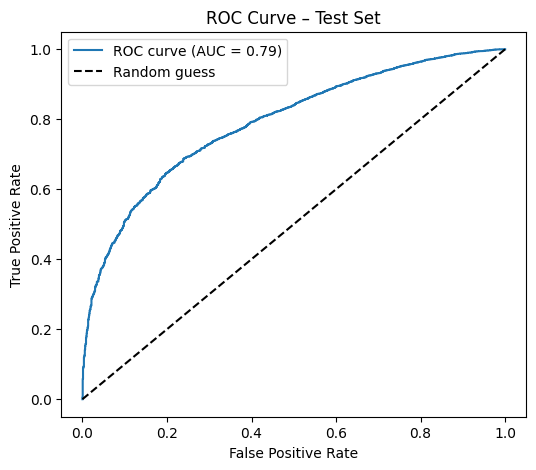

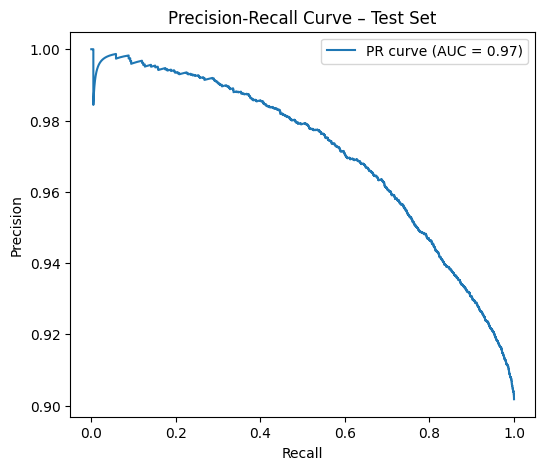

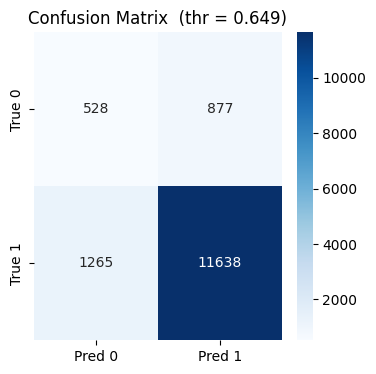

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (roc_curve, precision_recall_curve,
                             confusion_matrix, classification_report, auc)

# ──────────────────────────────────────────
# 1)  choose the operating threshold
# ──────────────────────────────────────────
chosen_thr = 0.649           # <‑‑ your fixed threshold
print("Using threshold =", chosen_thr)

# probabilities were already computed:
# y_proba = best_model.predict([...]).ravel()

y_pred = (y_proba >= chosen_thr).astype(int)
cm     = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, digits=4, zero_division=0))

# ──────────────────────────────────────────
# 2)  ROC curve
# ──────────────────────────────────────────
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc_val = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc_val:.2f})')
plt.plot([0,1], [0,1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Test Set'); plt.legend(); plt.show()

# ──────────────────────────────────────────
# 3)  Precision‑Recall curve
# ──────────────────────────────────────────
prec, rec, _ = precision_recall_curve(y_test, y_proba)
pr_auc_val   = auc(rec, prec)

plt.figure(figsize=(6,5))
plt.plot(rec, prec, label=f'PR curve (AUC = {pr_auc_val:.2f})')
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.title('Precision‑Recall Curve – Test Set'); plt.legend(); plt.show()

# ──────────────────────────────────────────
# 4)  Confusion‑matrix heat‑map at chosen_thr
# ──────────────────────────────────────────
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred 0','Pred 1'],
            yticklabels=['True 0','True 1'])
plt.title(f'Confusion Matrix  (thr = {chosen_thr:.3f})')
plt.show()


# Charts and Figures


In [ ]:
from graphviz import Digraph

# -----------------------------------------------------------------------------
# Build a top-to-bottom flowchart for the Olist churn-prediction pipeline
# -----------------------------------------------------------------------------
dot = Digraph(name="pipeline_tb", format="png")
dot.attr(rankdir="TB", fontsize="12", nodesep="0.5", ranksep="0.8")
dot.attr('node', shape='box')

# ---- Nodes ------------------------------------------------------------------
dot.node("A", "Data Acquisition and Merging\n(Brazilian E-Commerce Public Dataset by Olist)")
dot.node("B", "Exploratory Data Analysis")
dot.node("C", "Data Cleaning and Pre-processing\n"
               "• Handle missing values\n"
               "• Aggregate geolocation data\n"
               "• Define 90-day churn outcome")
dot.node("D", "Feature Engineering\n"
               "• Tabular (static)\n"
               "• Temporal sequences (LSTM input)\n"
               "• Spatial grids (CNN input)")
dot.node("E", "Dataset Partitioning\nTrain, Validation, Test")
dot.node("F1", "Baseline: Random Forest")
dot.node("F2", "CNN Model (Spatial Features)")
dot.node("F3", "LSTM Model (Temporal Features)")
dot.node("F4", "Hybrid CNN-LSTM Architecture")
dot.node("G", "Hyperparameter Tuning")
dot.node("H", "Model Evaluation\nAUC-ROC, PR-AUC, F1")
dot.node("I", "Model Saving and Logging")

# ---- Edges ------------------------------------------------------------------
dot.edge("A", "B")
dot.edge("B", "C")
dot.edge("C", "D")
dot.edge("D", "E")
dot.edge("E", "F1")
dot.edge("E", "F2")
dot.edge("E", "F3")
dot.edge("E", "F4")
dot.edge("F1", "G")
dot.edge("F2", "G")
dot.edge("F3", "G")
dot.edge("F4", "G")
dot.edge("G", "H")
dot.edge("H", "I")

# -----------------------------------------------------------------------------
# Render to file (PNG, PDF, etc.)
# -----------------------------------------------------------------------------
output_path = "pipeline_flowchart_tb"
dot.render(output_path, cleanup=True)   # creates pipeline_flowchart_tb.png (and .gv)

print(f"Flowchart saved to {output_path}.png")


Flowchart saved to pipeline_flowchart_tb.png


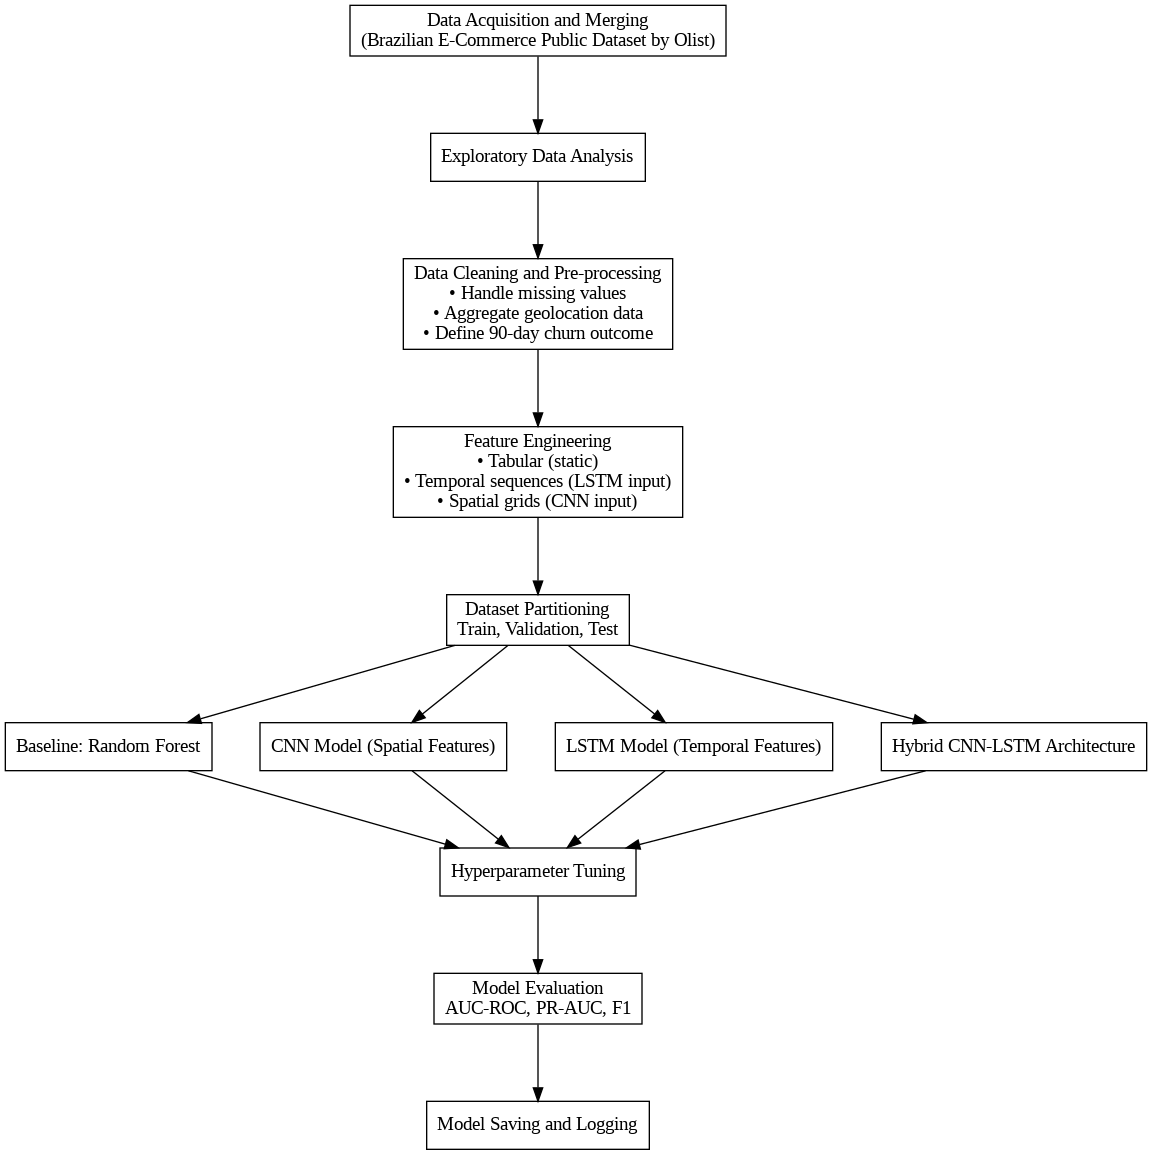

In [ ]:
from IPython.display import Image
Image(filename="pipeline_flowchart_tb.png")


In [ ]:
from google.colab import files
files.download("pipeline_flowchart_tb.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

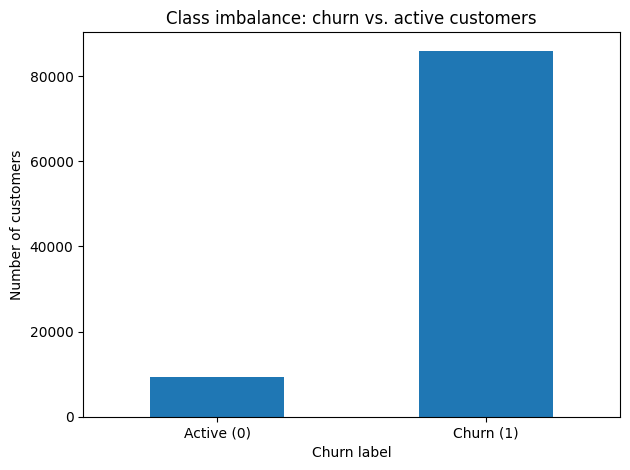

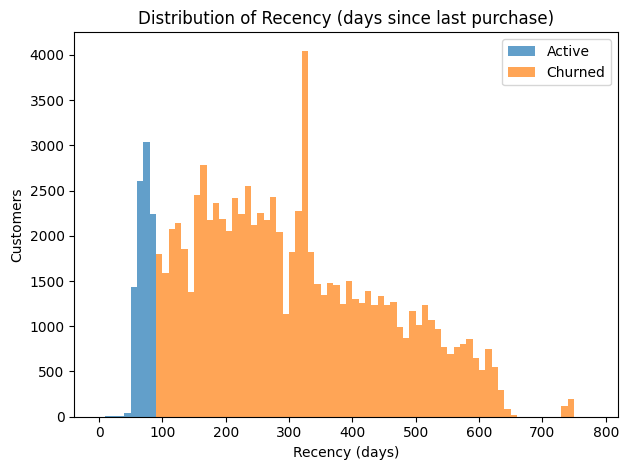

<Figure size 640x480 with 0 Axes>

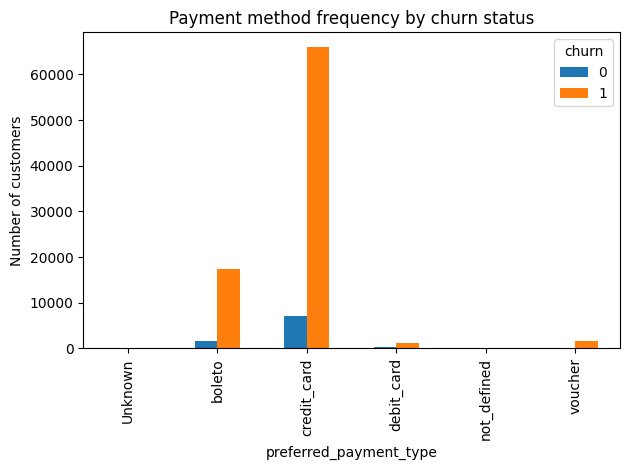

<ipython-input-2-229579da4776>:77: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


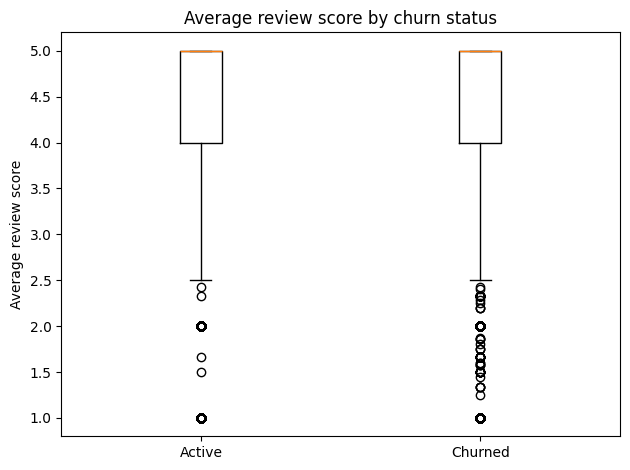

<ipython-input-2-229579da4776>:92: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')


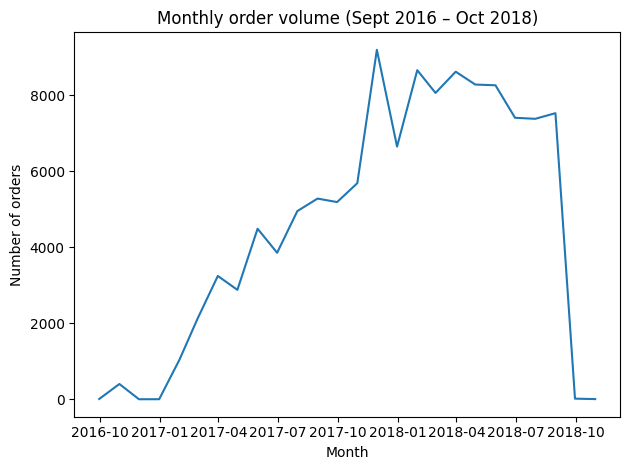

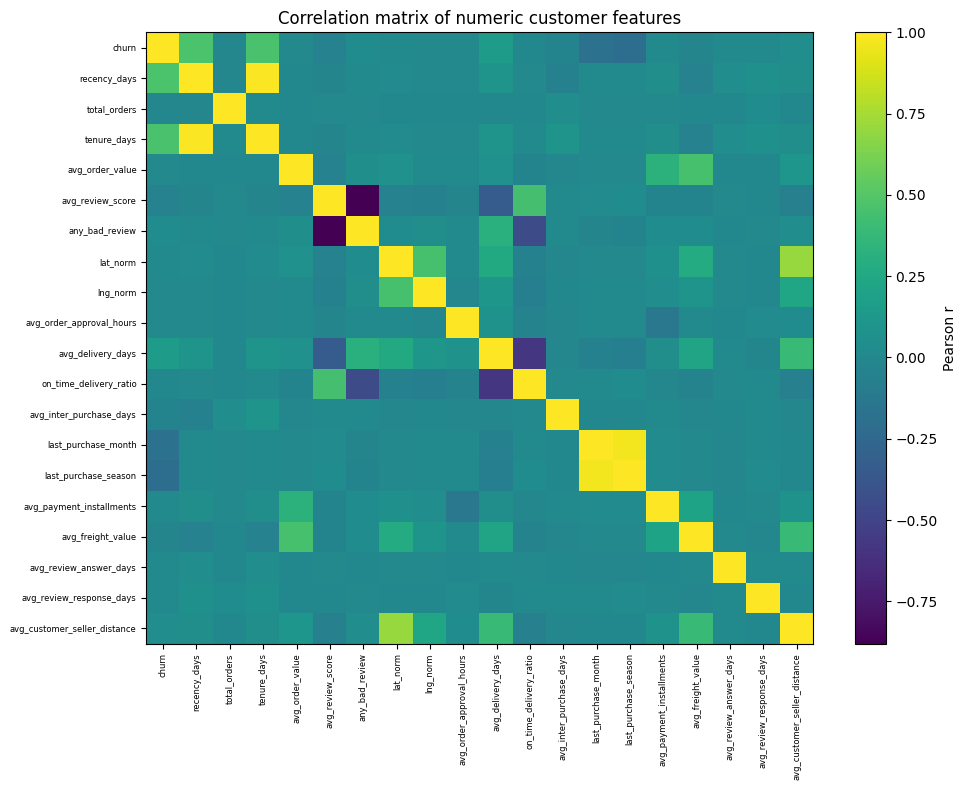

In [2]:
# EDA script for Olist churn study
# -------------------------------------------------
# Requirements:
#   pip install pandas matplotlib numpy
# -------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os



# ---------- CONFIG ----------
DATA_DIR   = Path('/content/drive/MyDrive/Thesis/Datasets')
CUST_FILE  = DATA_DIR / 'customer_df_rf.csv'
ORDER_FILE = DATA_DIR / 'full_data_preprocessed_checkpoint.csv'
os.makedirs("figures", exist_ok=True)   # create output folder once
# -----------------------------

# ---------- 0. LOAD DATA ----------
df_cust  = pd.read_csv(CUST_FILE,  low_memory=False)
df_order = pd.read_csv(ORDER_FILE, low_memory=False,
                       parse_dates=['order_purchase_timestamp'])

# ---------- 1. CLASS IMBALANCE ----------
plt.figure()
df_cust['churn'].value_counts().sort_index().plot(kind='bar')
plt.title('Class imbalance: churn vs. active customers')
plt.xlabel('Churn label')
plt.ylabel('Number of customers')
plt.xticks([0, 1], ['Active (0)', 'Churn (1)'], rotation=0)
plt.tight_layout()
plt.savefig("figures/fig_class_imbalance.png", dpi=300)
plt.show()


# ---------- 2. RECENCY HISTOGRAM ----------
plt.figure()
bins = np.arange(0, df_cust['recency_days'].max() + 10, 10)
plt.hist(
    df_cust.loc[df_cust['churn'] == 0, 'recency_days'],
    bins=bins, alpha=0.7, label='Active'
)
plt.hist(
    df_cust.loc[df_cust['churn'] == 1, 'recency_days'],
    bins=bins, alpha=0.7, label='Churned'
)
plt.title('Distribution of Recency (days since last purchase)')
plt.xlabel('Recency (days)')
plt.ylabel('Customers')
plt.legend()
plt.tight_layout()
plt.savefig("figures/fig_recency_distribution.png", dpi=300)
plt.show()

# ---------- 3. PAYMENT-TYPE BREAKDOWN ----------
plt.figure()

payment_counts = (
    df_cust.groupby(['preferred_payment_type', 'churn'])  # ← updated column name
           .size()
           .unstack(fill_value=0)
)

payment_counts.plot(kind='bar', stacked=False)
plt.title('Payment method frequency by churn status')
plt.ylabel('Number of customers')
plt.tight_layout()
plt.savefig("figures/fig_payment_breakdown.png", dpi=300)
plt.show()


# ---------- 4. REVIEW-SCORE DISTRIBUTIONS ----------
plt.figure()
plt.boxplot(
    [df_cust.loc[df_cust['churn'] == 0, 'avg_review_score'],
     df_cust.loc[df_cust['churn'] == 1, 'avg_review_score']],
    labels=['Active', 'Churned']
)
plt.title('Average review score by churn status')
plt.ylabel('Average review score')
plt.tight_layout()
plt.savefig("figures/fig_review_score_dist.png", dpi=300)
plt.show()

# ---------- 5. TEMPORAL ORDER FREQUENCY ----------
plt.figure()
monthly_orders = (df_order
                  .set_index('order_purchase_timestamp')
                  .resample('M')
                  .size())
plt.plot(monthly_orders.index, monthly_orders.values)
plt.title('Monthly order volume (Sept 2016 – Oct 2018)')
plt.xlabel('Month')
plt.ylabel('Number of orders')
plt.tight_layout()
plt.savefig("figures/fig_monthly_frequency.png", dpi=300)
plt.show()

# ---------- 6. FEATURE CORRELATION HEATMAP ----------
numeric_cols = df_cust.select_dtypes(include='number')
corr = numeric_cols.corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='viridis', aspect='auto')
plt.colorbar(label='Pearson r')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90, fontsize=6)
plt.yticks(range(len(corr.index)),   corr.index,   fontsize=6)
plt.title('Correlation matrix of numeric customer features')
plt.tight_layout()
plt.savefig("figures/fig_correlation_matrix.png", dpi=300)
plt.show()

# ---------- DONE ----------


In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
print(df_cust['churn'].value_counts())


churn
1    86015
0     9366
Name: count, dtype: int64


In [5]:
import tensorflow as tf

# Load the model from file
model = tf.keras.models.load_model("/content/drive/MyDrive/Thesis/hybrid_best_auc.keras", compile=False)


In [6]:
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, 32, 32, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 32, 32,    │        640 │ image_input[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 16, 16,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 16, 16,    │        256 │ max_pooling2d[0]… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequence_input      │ (None, 768, 9)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 16, 16,    │     36,928 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, 768, 9)    │          0 │ sequence_input[0… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 8, 8, 64)  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ masking_layer       │ (None, 768, 9)    │          0 │ sequence_input[0… │
│ (Masking)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ any (Any)           │ (None, 768)       │          0 │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 64)  │        256 │ max_pooling2d_1[… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 768, 64)   │     10,752 │ masking_layer[0]… │
│ (Bidirectional)     │                   │            │ any[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 8, 8, 32)  │     18,464 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_layer_1     │ (None, 768, 64)   │          0 │ bidirectional[0]… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 4, 4, 32)  │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 64)        │     24,832 │ dropout_layer_1[… │
│ (Bidirectional)     │                   │            │ any[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 4, 4, 32)  │        128 │ max_pooling2d_2[… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 130,465 (509.63 KB)

 Trainable params: 130,145 (508.38 KB)

 Non-trainable params: 320 (1.25 KB)

In [8]:
# For detailed configuration, loop through each layer and print attributes
print("\nLayer-wise hyperparameters:\n" + "="*40)
for i, layer in enumerate(model.layers):
    print(f"Layer {i}: {layer.name} ({layer.__class__.__name__})")
    config = layer.get_config()
    # Print all config parameters (shows units, filters, kernel_size, etc. as available)
    for key, value in config.items():
        print(f"  {key}: {value}")
    print('-'*40)


Layer-wise hyperparameters:
Layer 0: image_input (InputLayer)
  batch_shape: (None, 32, 32, 1)
  dtype: float32
  sparse: False
  name: image_input
----------------------------------------
Layer 1: conv2d (Conv2D)
  name: conv2d
  trainable: True
  dtype: {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}
  filters: 64
  kernel_size: (3, 3)
  strides: (1, 1)
  padding: same
  data_format: channels_last
  dilation_rate: (1, 1)
  groups: 1
  activation: relu
  use_bias: True
  kernel_initializer: {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}
  bias_initializer: {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}
  kernel_regularizer: None
  bias_regularizer: None
  activity_regularizer: None
  kernel_constraint: None
  bias_constraint: None
----------------------------------------
Layer 2: max_pooling2d (MaxPooling2D)
  nam

In [9]:
import sys
print(sys.version)


3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]
